#1. Import Libraries

In [1]:
#To supress warnings
from warnings import filterwarnings
filterwarnings('ignore')

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot


from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats



# 2.Set Options


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

#3. Read Data

In [3]:
insurance = pd.read_csv('/content/healthinsurance.csv')

insurance.head()

age     sex  weight       bmi hereditary_diseases  no_of_dependents  \
0 60.000000    male      64 24.300000           NoDisease                 1   
1 49.000000  female      75 22.600000           NoDisease                 1   
2 32.000000  female      64 17.800000            Epilepsy                 2   
3 61.000000  female      53 36.400000           NoDisease                 1   
4 19.000000  female      50 20.600000           NoDisease                 0   

   smoker         city  bloodpressure  diabetes  regular_ex    job_title  \
0       0      NewYork             72         0           0        Actor   
1       0       Boston             78         1           1     Engineer   
2       1  Phildelphia             88         1           1  Academician   
3       1    Pittsburg             72         1           0         Chef   
4       0      Buffalo             82         1           0   HomeMakers   

         claim  
0 13112.600000  
1  9567.000000  
2 32734.200000  
3 48517.600000  
4  1731.700000

#4. Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data prior to building predictive models.

Here we will analyze and prepare data to perform regression analysis:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. Refer data definition to ensure your data types are correct
3. If data types are not as per business context, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Analyze categorical variables
8. Analyze relationship between target variable and categorical variables
9. Perform feature engineering
10. Detect outliers
11. Recheck the correlation

#4.1 Understand the Dataset

#4.1.1 Data Dimension

To know the dimensions of the data:

In [4]:
insurance.shape

(15000, 13)

#4.1.2 Data Types

Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

1. Check data types
2. Change the incorrect data types
3. Recheck the data types after the conversion


1. Check data types

In [5]:
insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

From the above output, we see that the data type of 'smoker', 'diabetes' and 'regular_ex' is 'int64'.

But according to data definition, 'smoker', 'diabetes' and 'regular_ex' are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.


2. Change the incorrect data types



In [6]:
insurance.smoker = insurance.smoker.astype('object')
insurance.diabetes = insurance.diabetes.astype('object')
insurance.regular_ex = insurance.regular_ex.astype('object')

3. Recheck the data types after the conversion

In [7]:
insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

#4.1.3 Summary Statistics

In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables
1. For numerical variables, we use .describe()
2. For categorical features, we use .describe(include=object)


1. For numerical variables, we use .describe()

In [8]:
insurance.describe()

age       weight          bmi  no_of_dependents  bloodpressure  \
count 14604.000000 15000.000000 14044.000000      15000.000000   15000.000000   
mean     39.547521    64.909600    30.266413          1.129733      68.650133   
std      14.015966    13.701935     6.122950          1.228469      19.418515   
min      18.000000    34.000000    16.000000          0.000000       0.000000   
25%      27.000000    54.000000    25.700000          0.000000      64.000000   
50%      40.000000    63.000000    29.400000          1.000000      71.000000   
75%      52.000000    76.000000    34.400000          2.000000      80.000000   
max      64.000000    95.000000    53.100000          5.000000     122.000000   

             claim  
count 15000.000000  
mean  13401.437620  
std   12148.239619  
min    1121.900000  
25%    4846.900000  
50%    9545.650000  
75%   16519.125000  
max   63770.400000

The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.
Note, the average age of a policyholder claiming the insurance is 39 years. The claim amount is between 1121 to 63770. Here the mean bmi of a policyholder is 30 (the healthy bmi range is between 18.5 to 24.9) and average weight is 64.

If we observe the count of all the variables, there is less count for variable age and bmi than other variables. So we can say that there are missing values in these variables. Also, the minimum bloodpressure is zero, which is invalid. We need to treat them appropriately.

2. For categorical features, we use .describe(include=object)

In [9]:
insurance.describe(include = object)

sex hereditary_diseases  smoker        city  diabetes  regular_ex  \
count    15000               15000   15000       15000     15000       15000   
unique       2                  10       2          91         2           2   
top     female           NoDisease       0  NewOrleans         1           0   
freq      7652               13998   12028         302     11655       11638   

       job_title  
count      15000  
unique        35  
top      Student  
freq        1320

The summary statistics for categorical variables can be interpreted as:

count - Total number of observations

unique - Number of unique classes in a variable

top - The most repeated class

freq - Frequency of most repeated class


For variable city, it is apparent that data has been taken from 91 different cities. Also, most of the policyholder are from NewOrleans.

In addition, there are more number of non smokers in the dataset and most of the policyholder are diabetic

#4.1.4 Missing Values

In order to get the count of missing values in each column, we use the in-built function .isnull().sum()

In [10]:
Total = insurance.isnull().sum().sort_values(ascending=False)

Percent = (insurance.isnull().sum()*100/insurance.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total,Percent], axis=1,keys=['Total','Percentage of Missing Values'])

missing_data


Total  Percentage of Missing Values
bmi                    956                      6.373333
age                    396                      2.640000
sex                      0                      0.000000
weight                   0                      0.000000
hereditary_diseases      0                      0.000000
no_of_dependents         0                      0.000000
smoker                   0                      0.000000
city                     0                      0.000000
bloodpressure            0                      0.000000
diabetes                 0                      0.000000
regular_ex               0                      0.000000
job_title                0                      0.000000
claim                    0                      0.000000

The missing values are present in the data for the age and bmi variables. There are 396 (2.6%) missing values for the variable age and 956 (6.4%) missing values for the variable bmi

#Visualize Missing Values using Heatmap

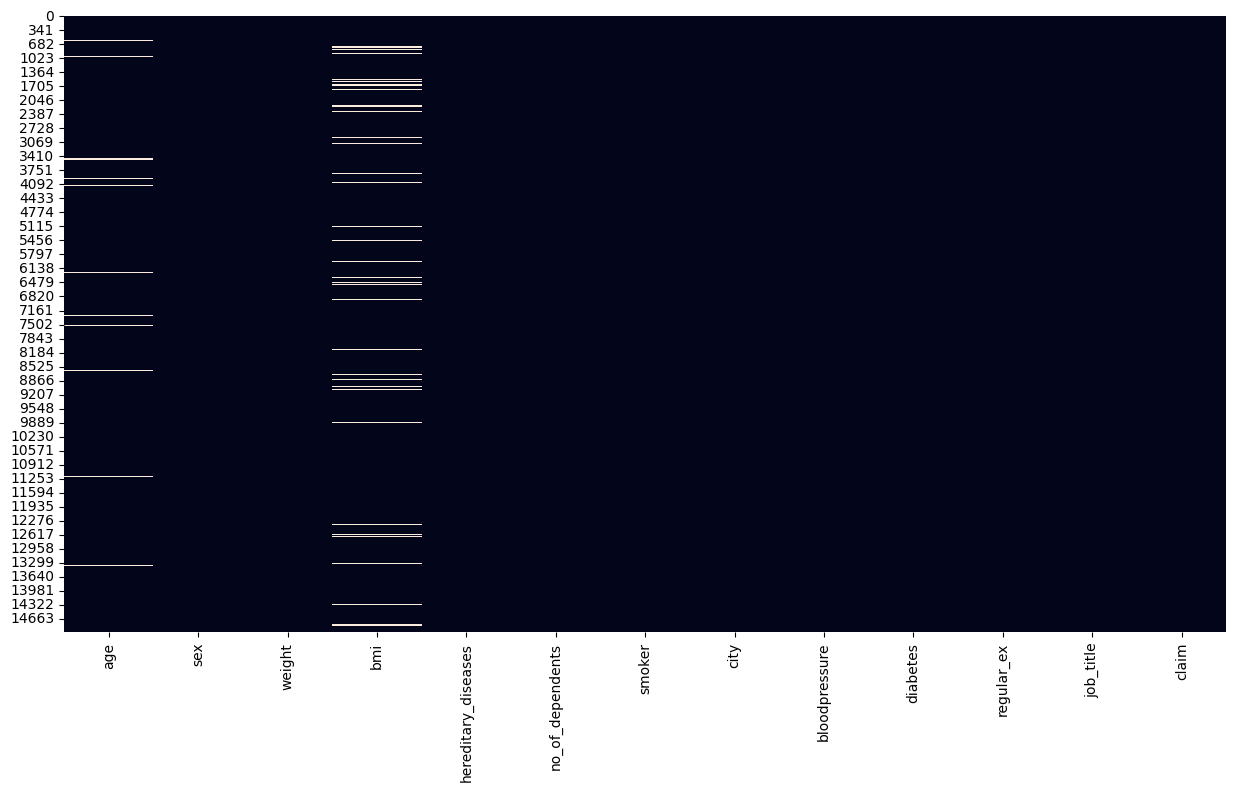

In [11]:
plt.figure(figsize=(15,8))

sns.heatmap(insurance.isnull(), cbar=False)

plt.show()

Deal with Missing Values
How to deal with missing data?

Depending on scenarios, you may:
a. Drop the whole row
b. Drop the whole column

OR replace:
a. The missing values with mean
b. The missing values with median
c. Replace it based on other functions


The entire column is dropped only if most entries (80%-90%) in the column are missing. We have the option to either drop the rows containing the missing values or replace them. In our dataset, there are not many values that are missing. So, we opt to replace these values. For the variable 'age', we will replace missing values by the mean of age across the gender.

In [12]:
# check the average age for male and female
# group the age by sex using 'groupby'
# 'axis = 0' splits along rows
# mean(): returns the mean age for each sex
insurance['age'].groupby(insurance['sex'], axis=0).mean()

sex
female   39.361040
male     39.738395
Name: age, dtype: float64

In [13]:
# fill the missing values with the mean value of 'age' using 'fillna()'
# mean(): returns the mean age
# inplace: makes permanent changes in the dataframe
insurance['age'].fillna(insurance['age'].mean(),inplace=True)

In [14]:
insurance['bmi'].fillna(insurance['bmi'].mean(),inplace=True)

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. Let us replace these missing values with the median value.



In [15]:
median_bloodpressure = insurance['bloodpressure'].median()
insurance['bloodpressure'] = insurance['bloodpressure'].replace(0,median_bloodpressure)

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'.

In [16]:
insurance.describe()

age       weight          bmi  no_of_dependents  bloodpressure  \
count 15000.000000 15000.000000 15000.000000      15000.000000   15000.000000   
mean     39.547521    64.909600    30.266413          1.129733      72.228533   
std      13.829705    13.701935     5.924606          1.228469      11.269793   
min      18.000000    34.000000    16.000000          0.000000      40.000000   
25%      27.000000    54.000000    25.900000          0.000000      64.000000   
50%      40.000000    63.000000    29.800000          1.000000      71.000000   
75%      51.000000    76.000000    34.100000          2.000000      80.000000   
max      64.000000    95.000000    53.100000          5.000000     122.000000   

             claim  
count 15000.000000  
mean  13401.437620  
std   12148.239619  
min    1121.900000  
25%    4846.900000  
50%    9545.650000  
75%   16519.125000  
max   63770.400000

#Recheck Missing Values using Heatmap

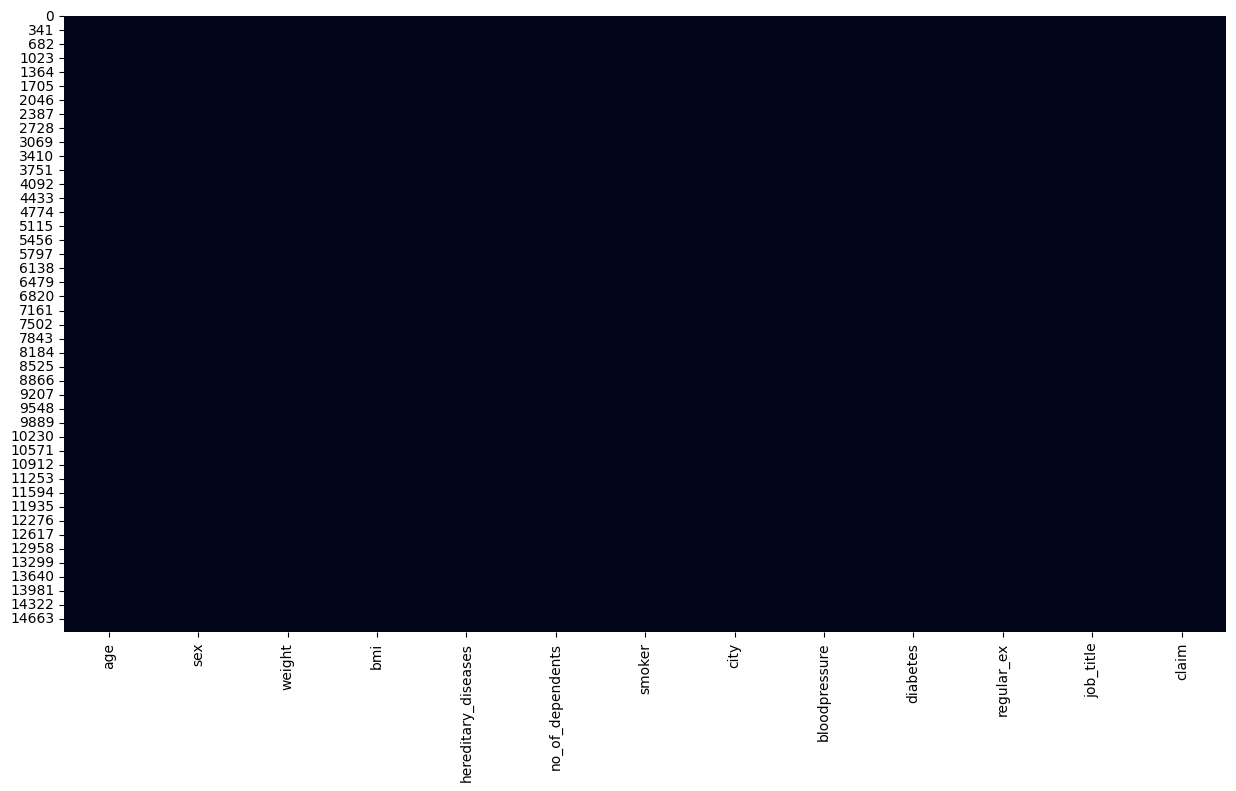

In [17]:
plt.figure(figsize=(15,8))

sns.heatmap(insurance.isnull(),cbar=False)

plt.show()

#4.1.5 Correlation


Correlation is the extent of linear relationship among numeric variables

It indicates the extent to which two variables increase or decrease in parallel

The value of a correlation coefficient ranges between -1 and 1

Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated

  
In order to compute the correlation matrix, we perform the following:
1. Filter out only the numeric variables from the dataframe using select_dtypes() function
2. Call the corr() function which will return the correlation matrix of numeric variables
3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

1. Filter out only the numeric variables from the dataframe using select_dtypes() function



In [18]:
numeric_features = insurance.select_dtypes(include=np.number)

numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

2. Call the corr() function which will return the correlation matrix of numeric variables

In [19]:
corr = numeric_features.corr()

corr

age   weight       bmi  no_of_dependents  bloodpressure  \
age              1.000000 0.281228  0.180123          0.058926       0.019223   
weight           0.281228 1.000000  0.243269          0.135687       0.018094   
bmi              0.180123 0.243269  1.000000          0.049704      -0.047979   
no_of_dependents 0.058926 0.135687  0.049704          1.000000       0.036976   
bloodpressure    0.019223 0.018094 -0.047979          0.036976       1.000000   
claim            0.298359 0.077716  0.197939          0.067614       0.037676   

                    claim  
age              0.298359  
weight           0.077716  
bmi              0.197939  
no_of_dependents 0.067614  
bloodpressure    0.037676  
claim            1.000000

3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

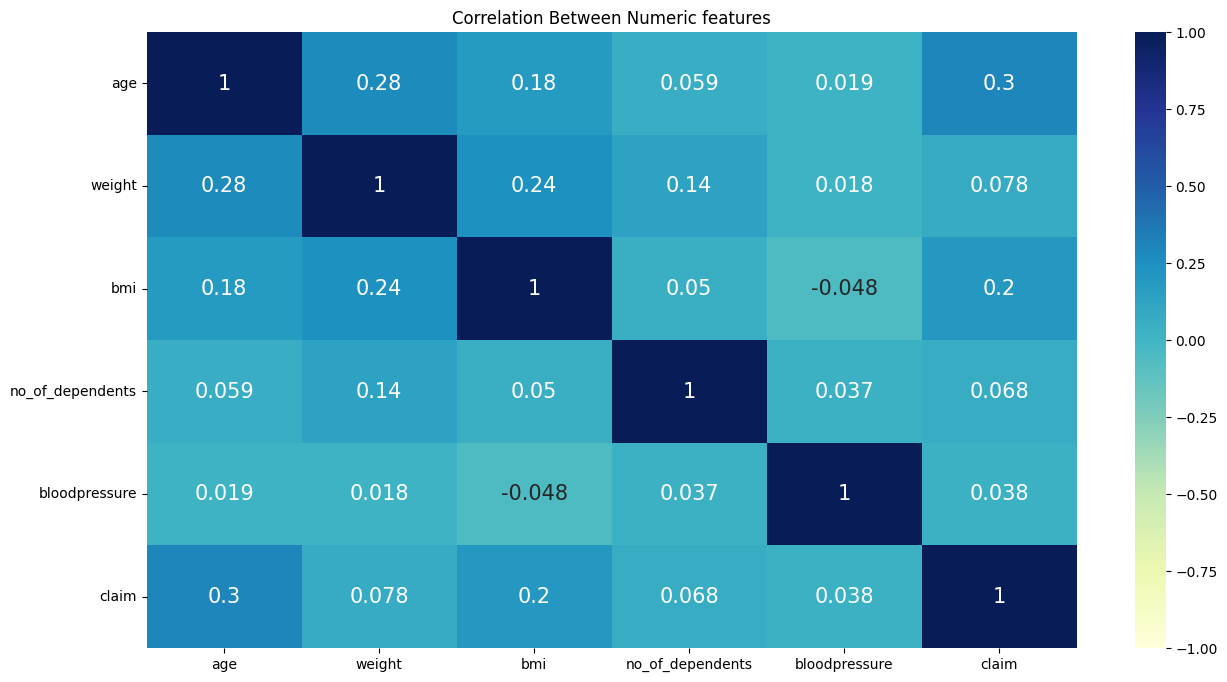

In [20]:
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={'size':15})

plt.title('Correlation Between Numeric features')

plt.show()

It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.

Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other

#4.1.6 Analyze Categorical Variables

In [21]:
insurance.describe(include=object)

sex hereditary_diseases  smoker        city  diabetes  regular_ex  \
count    15000               15000   15000       15000     15000       15000   
unique       2                  10       2          91         2           2   
top     female           NoDisease       0  NewOrleans         1           0   
freq      7652               13998   12028         302     11655       11638   

       job_title  
count      15000  
unique        35  
top      Student  
freq        1320

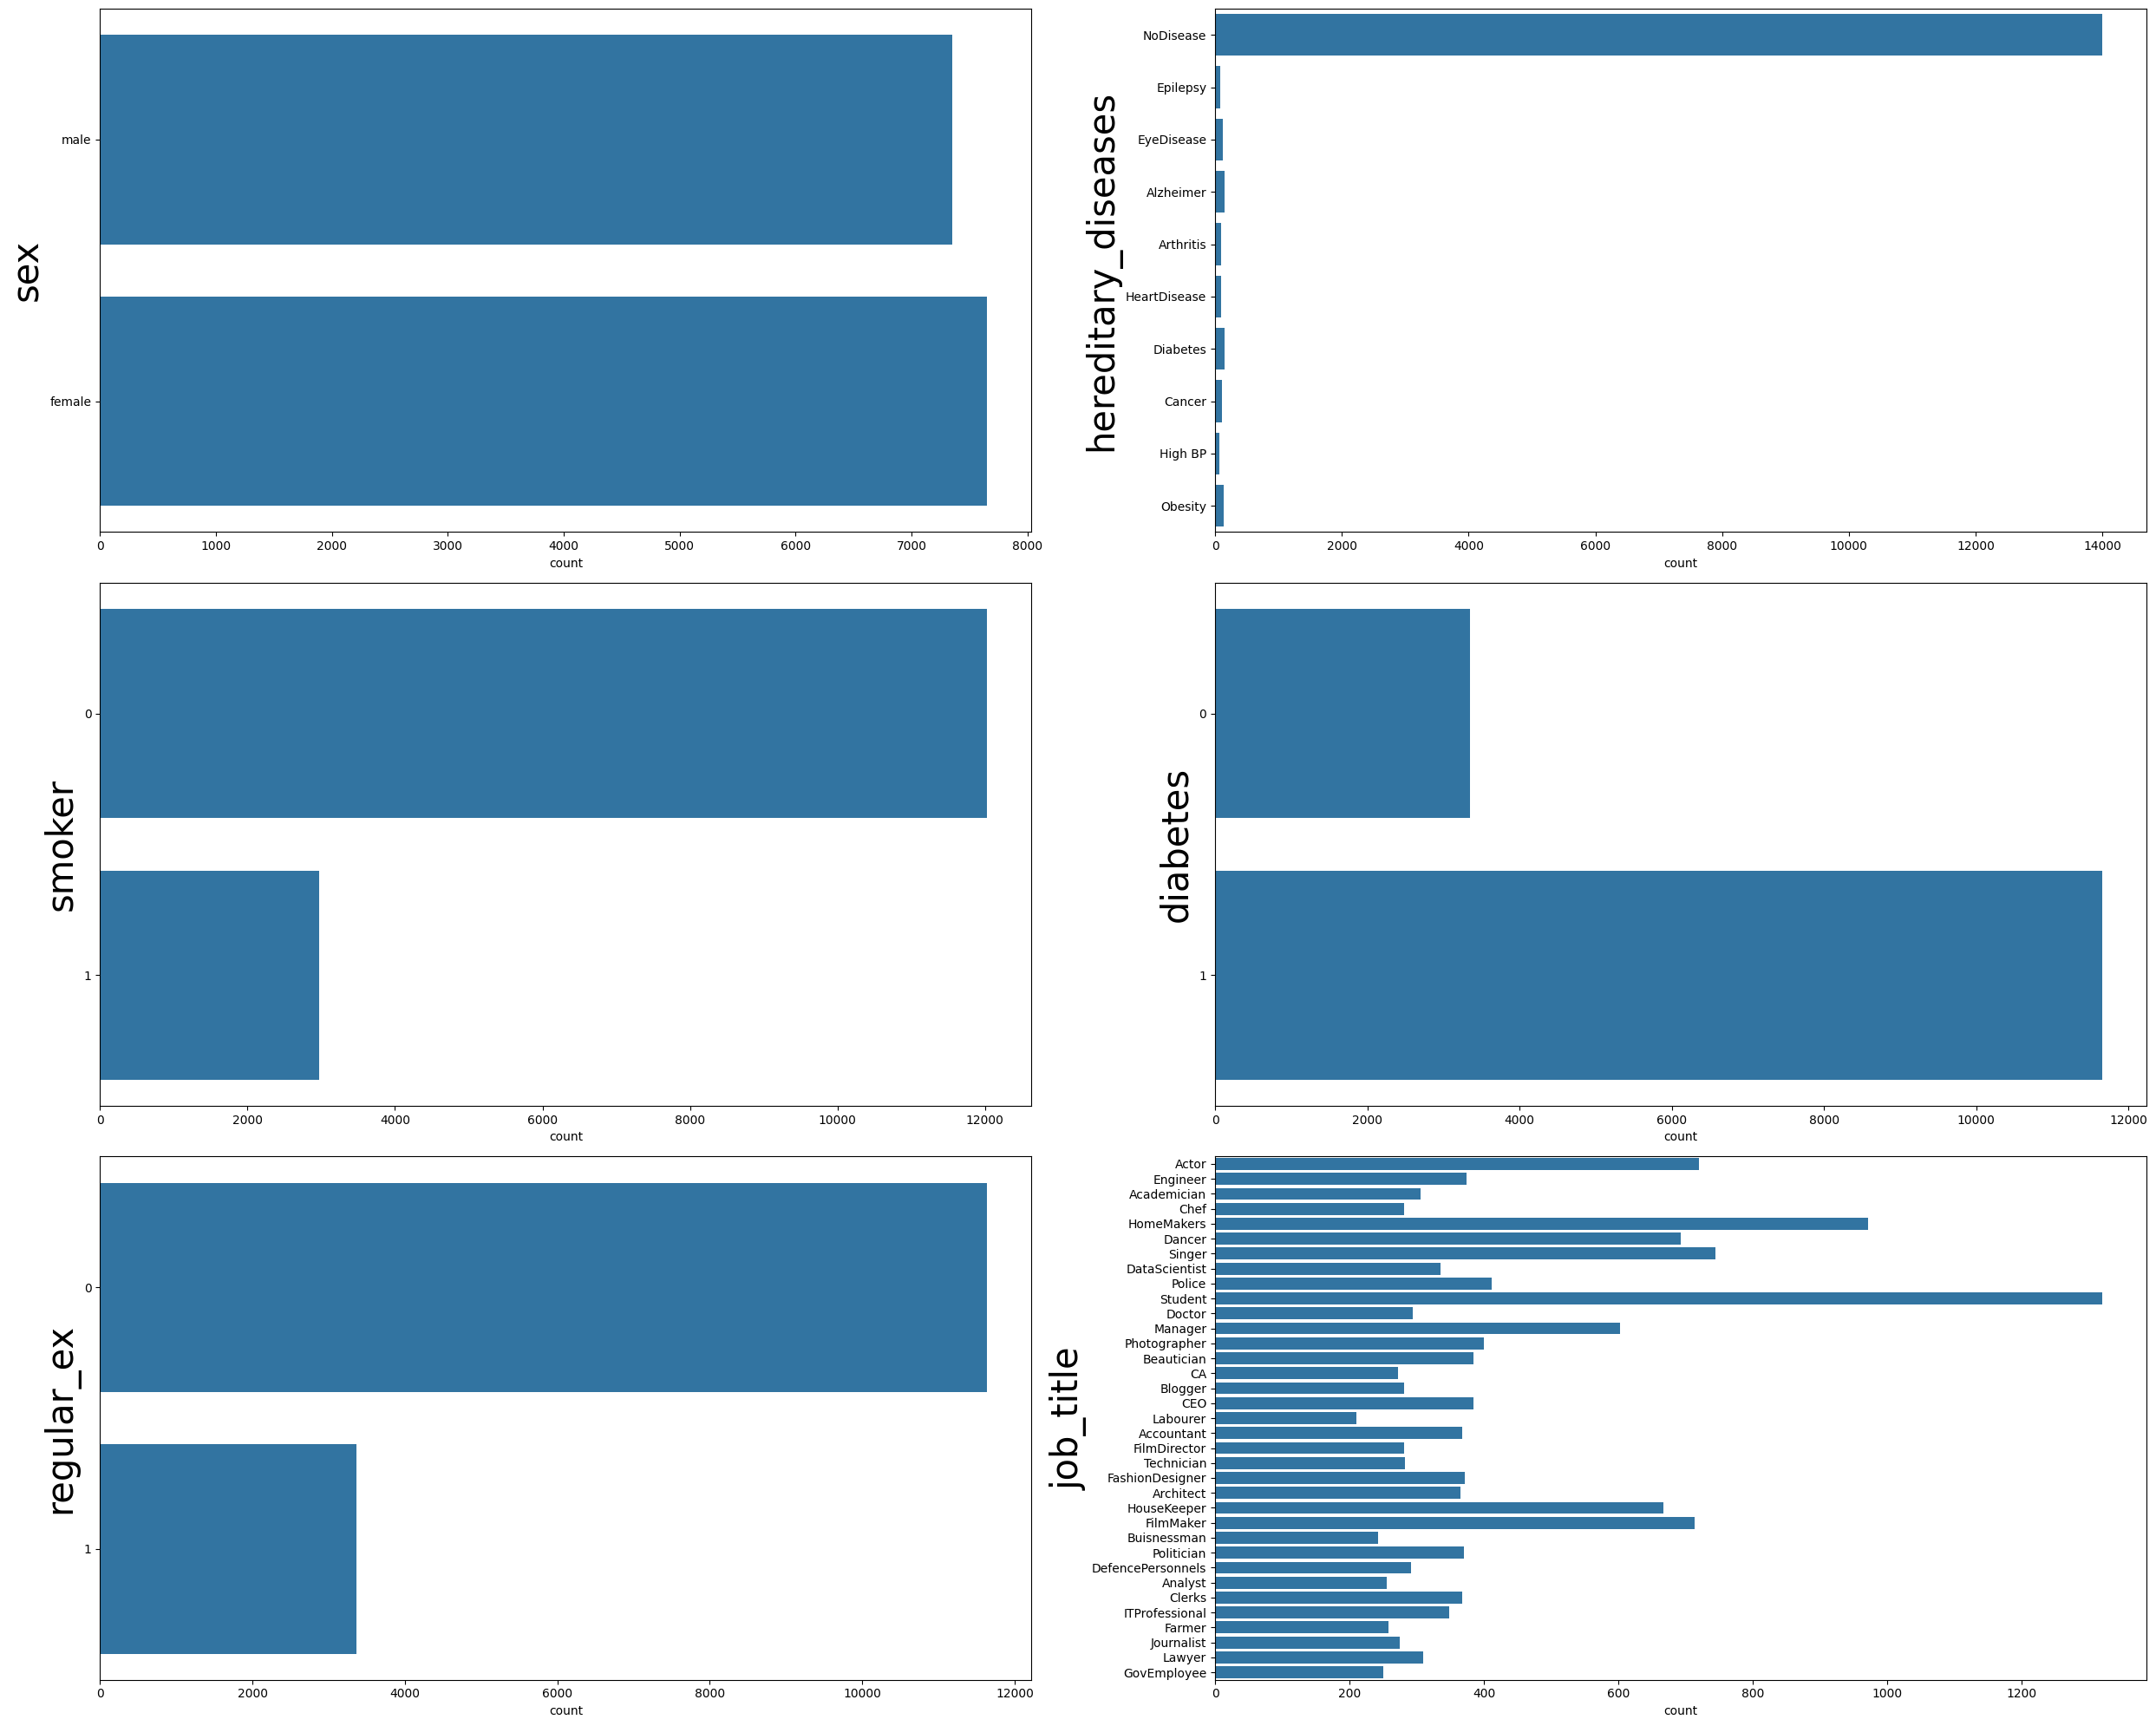

In [22]:
categorical_features = insurance.select_dtypes(include = 'object').drop(['city'],axis=1)
fig, ax = plt.subplots(3,2, figsize=(25,20))
for variable, subplot in zip(categorical_features, ax.flatten()):

    countplot = sns.countplot(y=insurance[variable], ax=subplot)
    countplot.set_ylabel(variable, fontsize = 30)

plt.tight_layout()
plt.show()

From the above plot we see that:

The number of males are femals are nearly equal

Most of the people in the data have no underlined disease

Also the number of non smokers is significantly large

Most of the policyholder do not excercise regularly

Many of the policyholders have diabetes

The had has large number of students

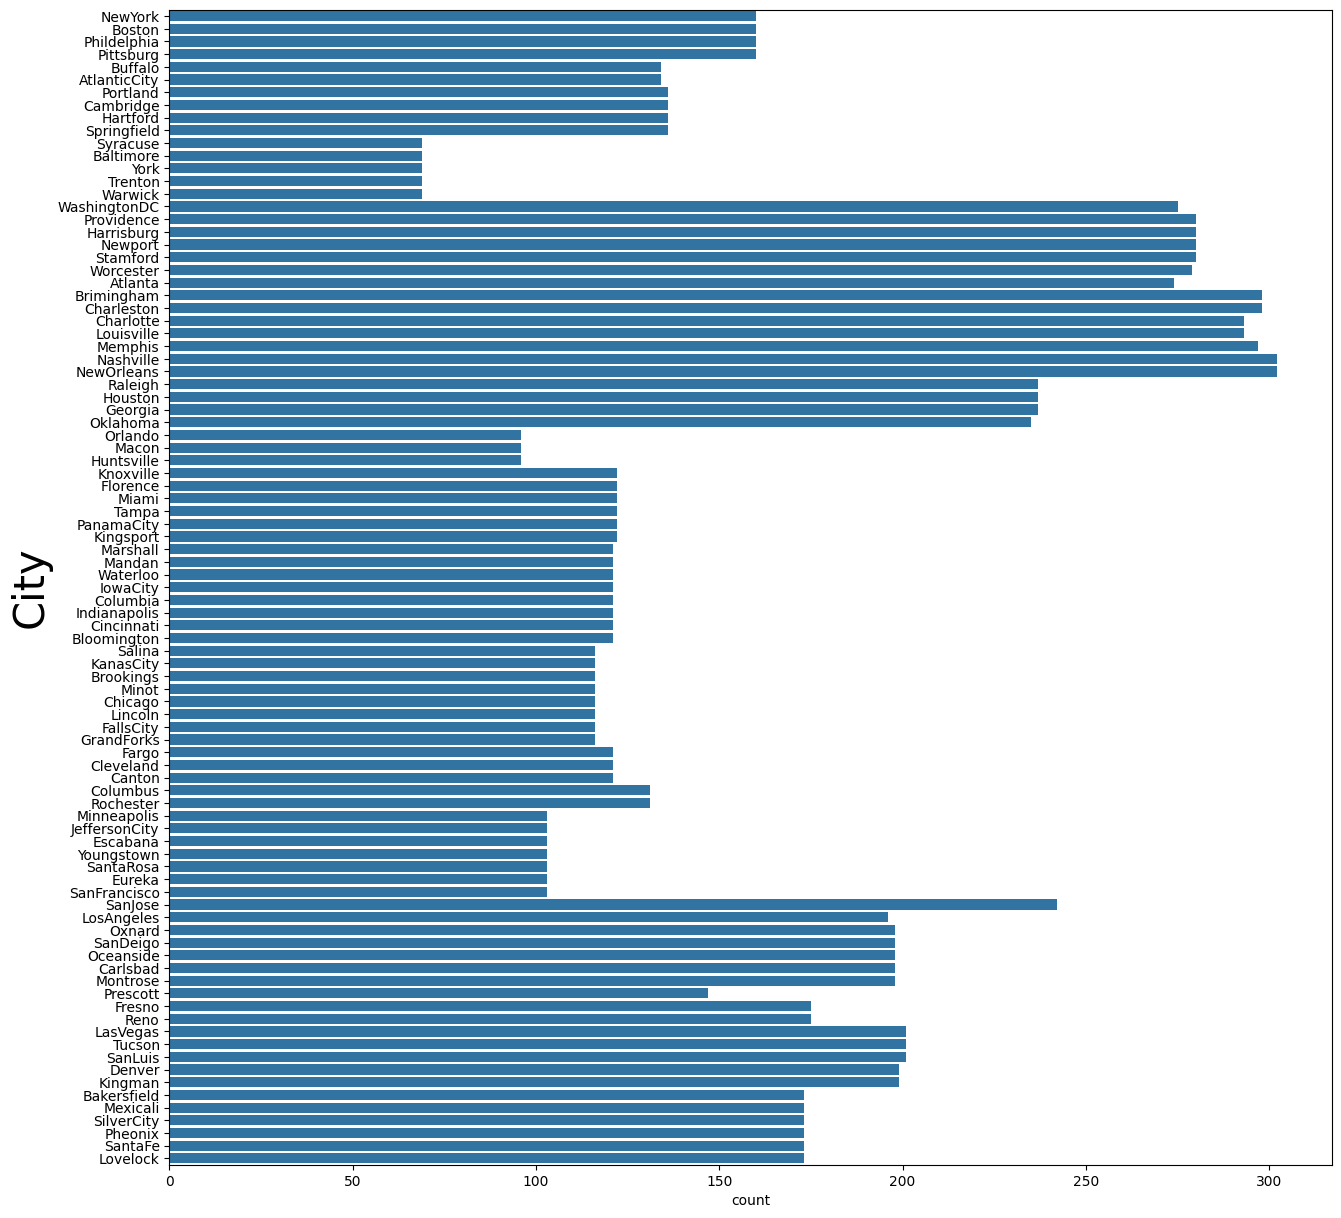

In [23]:
# set the figure size
plt.figure(figsize=(15, 15))

# plot the count plot using countplot()
# y: specifies the data to be plotted on y-axis
# orient: specifies the orientation of the barplot. "h" is used for horizontal orientation
# by default the orientation is vertical; but can be specifies by "v"
countplot = sns.countplot(y=insurance['city'], orient="h")

# set the x-axis labels
# fontsize = 30: sets the font size to 30
countplot.set_ylabel('City', fontsize = 30)

# display the plot
plt.show()


We see that there are many cities considered in the data. It is quite difficult to perform meaningful analysis on this variable.

#4.1.7 Analyze Relationship Between Target and Categorical Variables

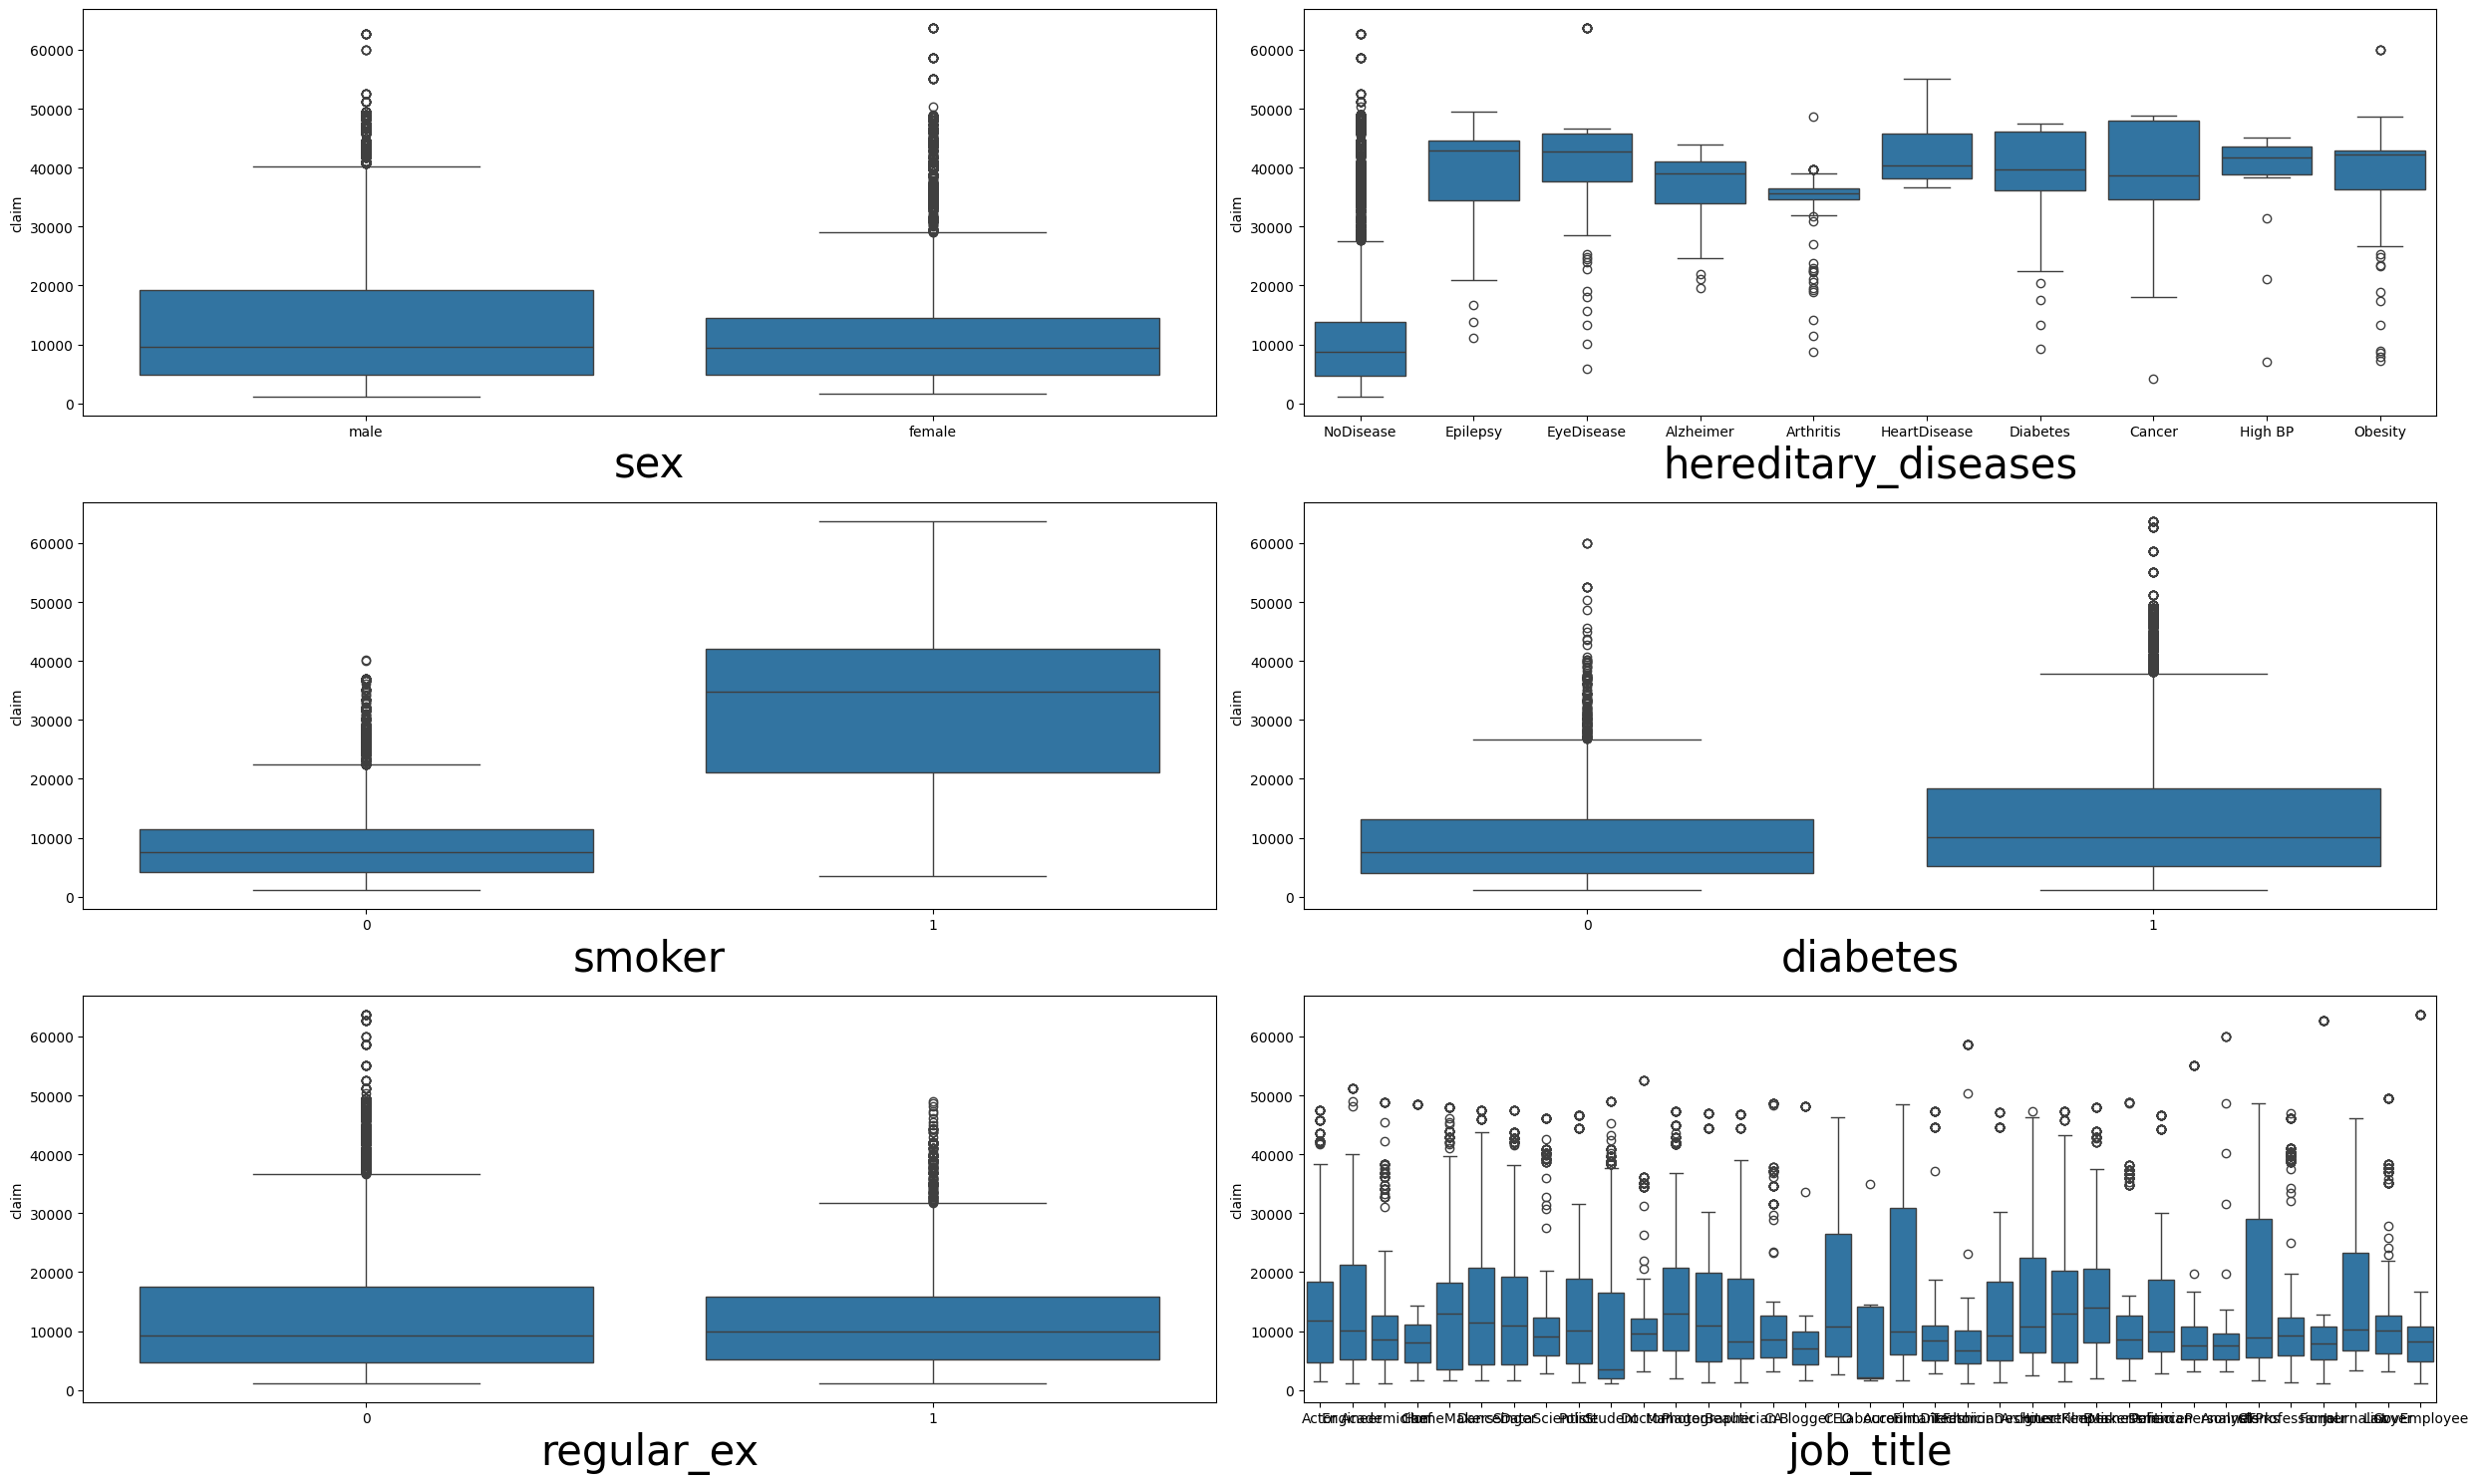

In [24]:
# plot the boxplot for each categorical variable
# create subplots using subplots()
# 6 subplots in 3 rows and 2 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables
for variable, subplot in zip(categorical_features, ax.flatten()):

    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='claim', data=insurance, ax=subplot)

    # set the x-axis labels
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()
plt.tight_layout()

# display the plot
plt.show()


Since the variable city has 91 categories, we shall plot it separately.

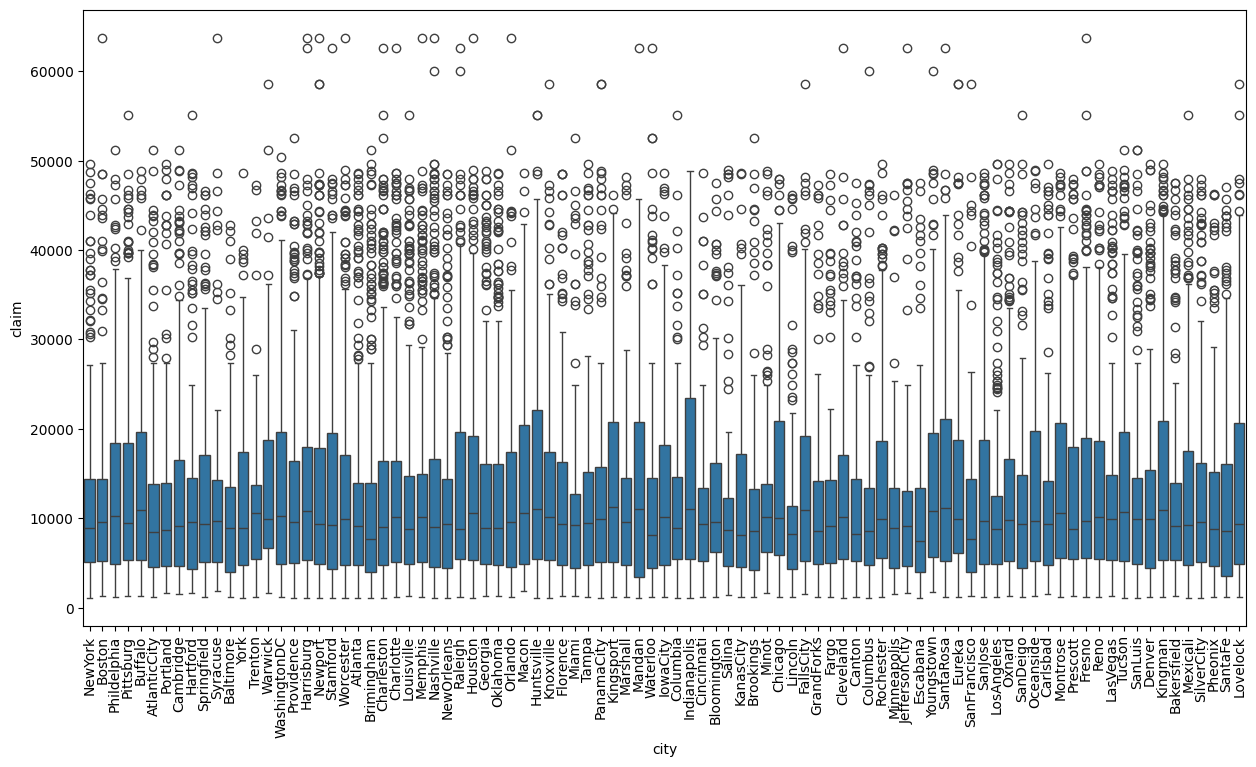

In [25]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the boxplot for categorical variable 'city'
# x: variable on x-axis
# y: variable in y-axis
# data: dataframe to be used
ax = sns.boxplot(x=insurance["city"], y=insurance['claim'], data=insurance)

# set the x-axis labels
# rotation: rotate the the x-axis ticks by 90˚
# fontsize = 30: sets the font size to 10
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)

# display the plot
plt.show()

1.We can see that 'hereditary_diseases' variable with 'NoDisease' class have very low average claim amount than other diseases. We can also see that there is a little variance in average claim cost between 'hereditary_diseases'

2.The distribution of claim between the two categories, 'smoker'(1) and 'non-smoker'(0), are distinct enough to take smokers as a potentially good predictor of the claim amount. We can see that a 'non-smoker' has a median claim amount of around 10000 while a 'smoker' has a median claim of 40000.

3.Also diabetic people have slightly higher average claim amount than non-diabetic people

4.This visualization helps us understand that there is a variance in average claim cost between different cities. However, the median claim cost is about 10000. As we can see, there are large number of cities and its not easy to interpret. Therefore we’ll combine all the cities into the region

#4.1.8 Feature Engineering

Create a new feature 'region' by combining the cities.

There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.

Let's create a new variable region. We will replace the original variable city with it.

In [26]:
# create a region column and combine the north-east cities
insurance['region'] = insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford',
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [27]:
# combine all the southern cities into the 'region' column
insurance['region'] = insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [28]:
# combine all the mid-west cities into the 'region' column
insurance['region'] = insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland',
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis',
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [29]:
# combine all the western cities into the 'region' column
insurance['region'] = insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside',
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [30]:
insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [31]:
insurance['region'].value_counts()

region
Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: count, dtype: int64

In [32]:
insurance = insurance.drop(['city'], axis=1)

In [33]:
insurance.head()

age     sex  weight       bmi hereditary_diseases  no_of_dependents  \
0 60.000000    male      64 24.300000           NoDisease                 1   
1 49.000000  female      75 22.600000           NoDisease                 1   
2 32.000000  female      64 17.800000            Epilepsy                 2   
3 61.000000  female      53 36.400000           NoDisease                 1   
4 19.000000  female      50 20.600000           NoDisease                 0   

  smoker  bloodpressure diabetes regular_ex    job_title        claim  \
0      0             72        0          0        Actor 13112.600000   
1      0             78        1          1     Engineer  9567.000000   
2      1             88        1          1  Academician 32734.200000   
3      1             72        1          0         Chef 48517.600000   
4      0             82        1          0   HomeMakers  1731.700000   

       region  
0  North-East  
1  North-East  
2  North-East  
3  North-East  
4  North-East

Analyze relationship between region and claim variable

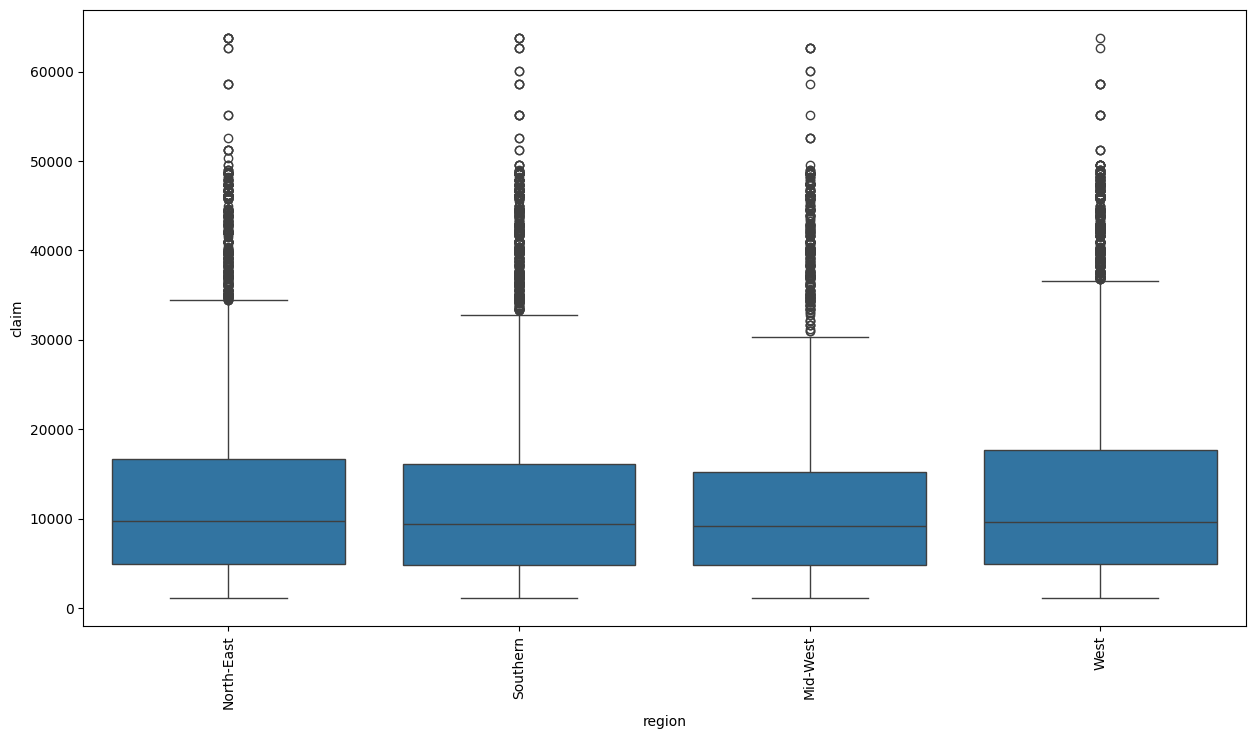

In [34]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="region", y="claim", data=insurance)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

#4.1.9 Discover Outliers

1. Plot boxplot for numerical data

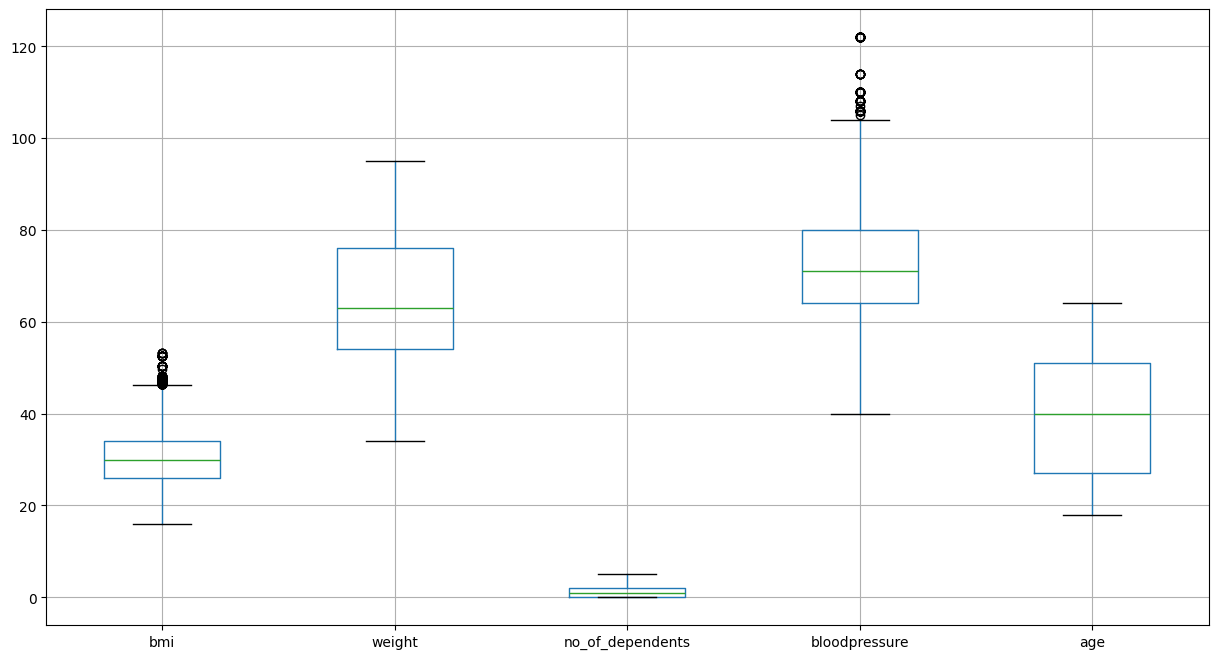

In [35]:
# set the plot size
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
# column: selects the specified columns
numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# to display the plot
plt.show()

2. Note the variables for which outliers are present


From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' there are points above the upper extreme - these points are outliers

Let us use the IQR method to remove the outliers

Outliers can also be detected using standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like






3. Remove outliers by IQR method

In [36]:
# calculate interquartile range

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable
# axis=1: specifies that the labels are dropped from the columns
Q1 = numeric_features.drop(['claim'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable
# axis=1: specifies that the labels are dropped from the columns
Q3 = numeric_features.drop(['claim'], axis=1).quantile(0.75)

# calculate of interquartile range
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

age                24.000000
weight             22.000000
bmi                 8.200000
no_of_dependents    2.000000
bloodpressure      16.000000
dtype: float64


In [37]:
outliers = (numeric_features.drop(['claim'], axis=1) < (Q1 - 1.5 * IQR)) | (numeric_features.drop(['claim'], axis=1) > (Q3 + 1.5 * IQR))

# Filter out the outliers from the original DataFrame
insurance = insurance[~outliers.any(axis=1)]

In [38]:
insurance.shape

(14723, 13)

4. Plot boxplot to recheck for outliers

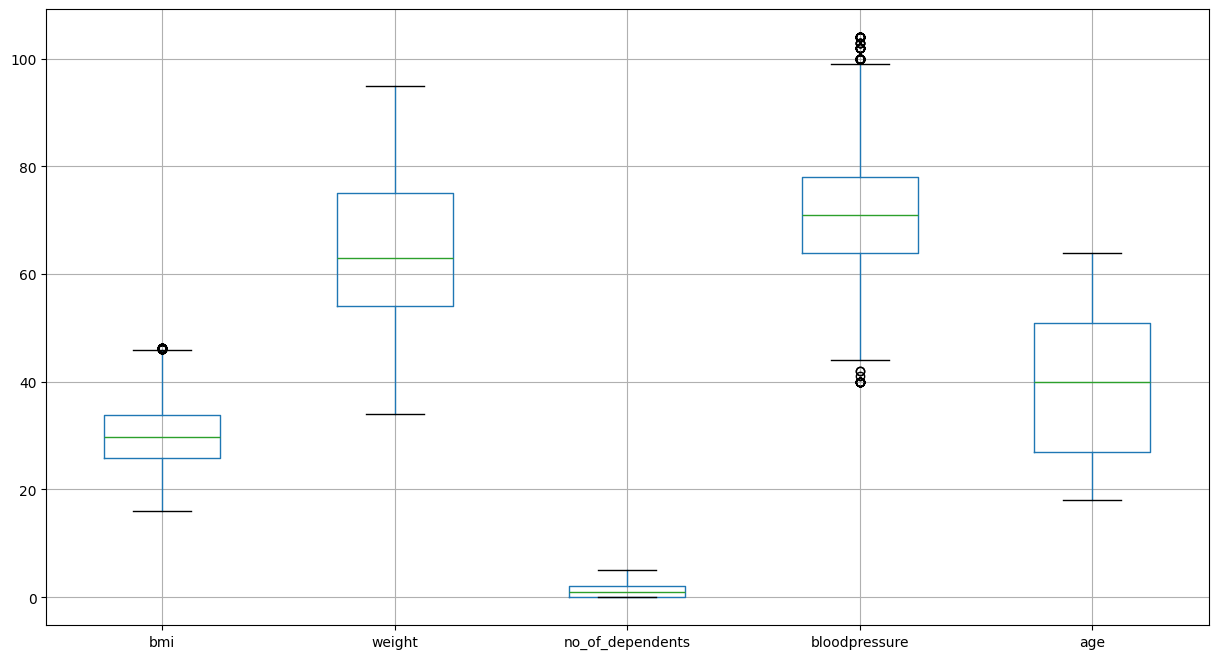

In [39]:
# set figure size
plt.rcParams['figure.figsize']=(15,8)

# recheck for outliers
# column: selects the specifies columns
insurance.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# display only the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

#4.1.10 Recheck the Correlation

1. Filter out only the numeric variables from the dataframe

In [40]:
numeric_features = insurance.select_dtypes(include=np.number)


numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

2. Call the corr() function which will return the correlation matrix of numeric variables

In [41]:
corr =  numeric_features.corr()


corr

age   weight       bmi  no_of_dependents  bloodpressure  \
age              1.000000 0.282136  0.196479          0.056423       0.023431   
weight           0.282136 1.000000  0.237473          0.134033       0.009877   
bmi              0.196479 0.237473  1.000000          0.044997      -0.055260   
no_of_dependents 0.056423 0.134033  0.044997          1.000000       0.027358   
bloodpressure    0.023431 0.009877 -0.055260          0.027358       1.000000   
claim            0.301544 0.080363  0.196193          0.077775       0.036679   

                    claim  
age              0.301544  
weight           0.080363  
bmi              0.196193  
no_of_dependents 0.077775  
bloodpressure    0.036679  
claim            1.000000

3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

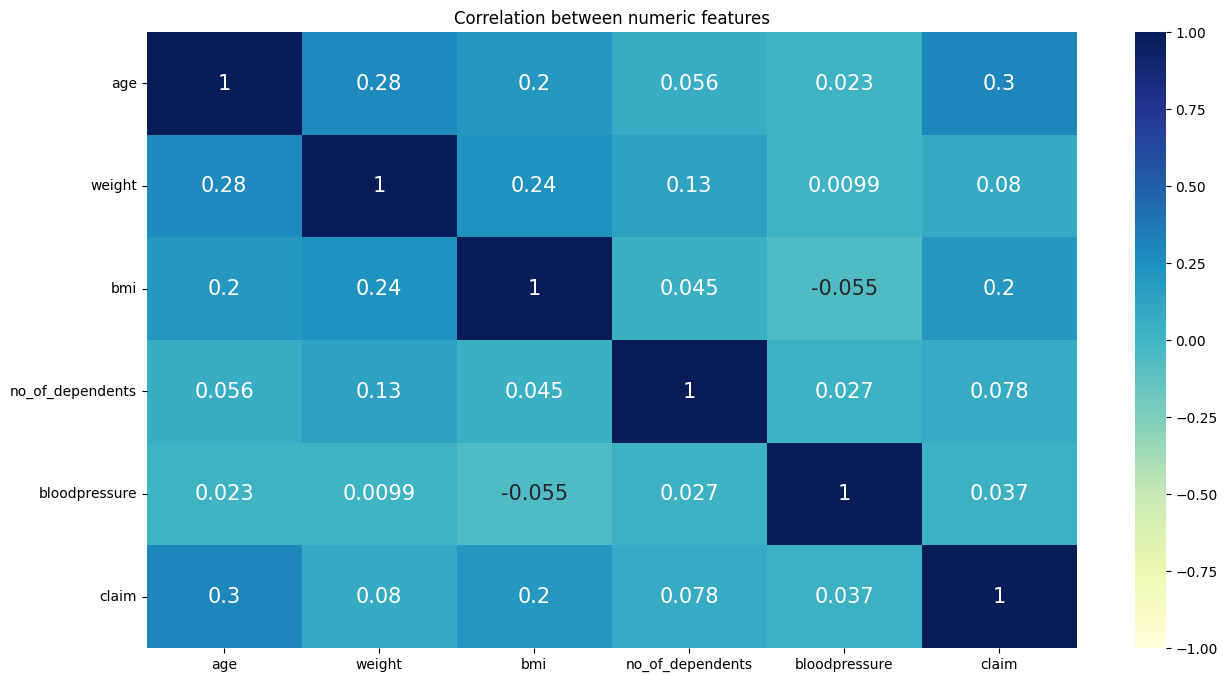

In [42]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It is seen that the numeric variables are not correlated with each other even after removing the outliers since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data

#4.2 Prepare the Data

#4.2.1 Check for Normality

1. Plot a histogram and also perform the Jarque-Bera test



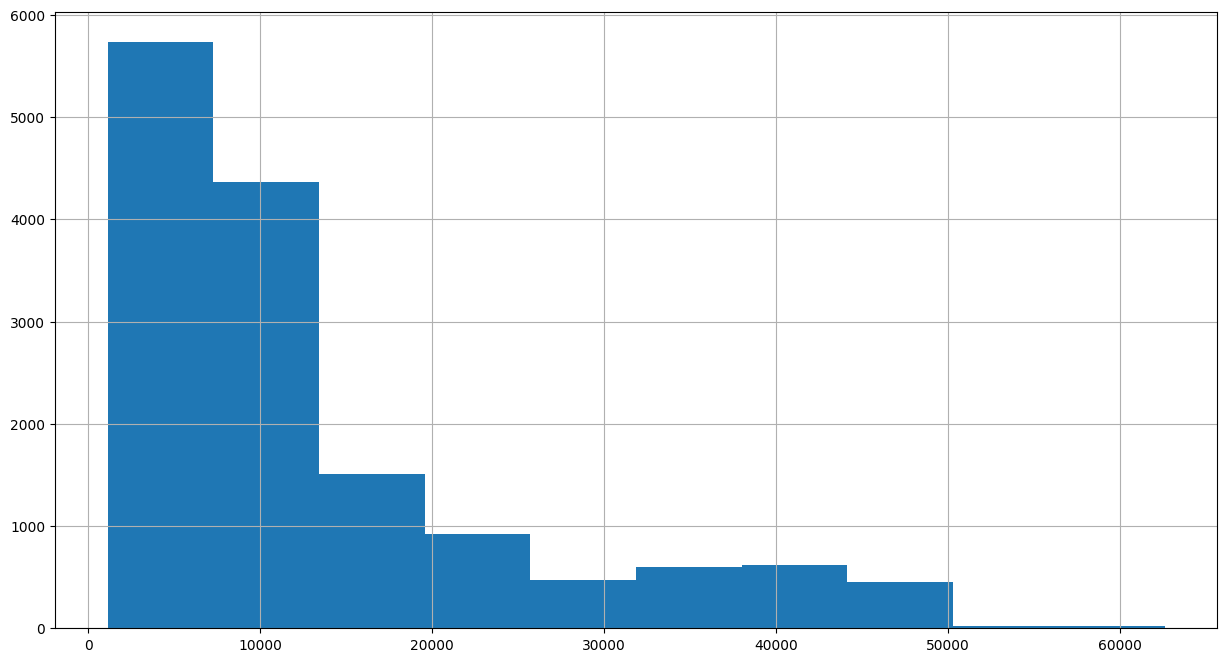

In [43]:
insurance.claim.hist()


plt.show()

From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed


We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights


Let us perform the Jarque-Bera test to check the normality of the target variable.


The null and alternate hypothesis of Jarque-Bera test are as follows:


H0: The data is normally distributed

H1: The data is not normally distributed

In [44]:
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(insurance["claim"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.


Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable.


Usually for testing the normality of data, the Shaprio Wilk Test is used. However, it does not work if the number of observations are more than 5000 inspite it being more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used. So we have used Jarque Bera test

2. If the data is not normally distributed, use log transformation to get near normally distributed data


As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_claim'

In [45]:
insurance['log_claim'] = np.log(insurance['claim'])

# display first 5 rows of the data
insurance.head()

age     sex  weight       bmi hereditary_diseases  no_of_dependents  \
0 60.000000    male      64 24.300000           NoDisease                 1   
1 49.000000  female      75 22.600000           NoDisease                 1   
2 32.000000  female      64 17.800000            Epilepsy                 2   
3 61.000000  female      53 36.400000           NoDisease                 1   
4 19.000000  female      50 20.600000           NoDisease                 0   

  smoker  bloodpressure diabetes regular_ex    job_title        claim  \
0      0             72        0          0        Actor 13112.600000   
1      0             78        1          1     Engineer  9567.000000   
2      1             88        1          1  Academician 32734.200000   
3      1             72        1          0         Chef 48517.600000   
4      0             82        1          0   HomeMakers  1731.700000   

       region  log_claim  
0  North-East   9.481329  
1  North-East   9.166075  
2  North-East  10.396176  
3  North-East  10.789682  
4  North-East   7.456859

3. Recheck for normality by plotting histogram and performing Jarque-Bera test

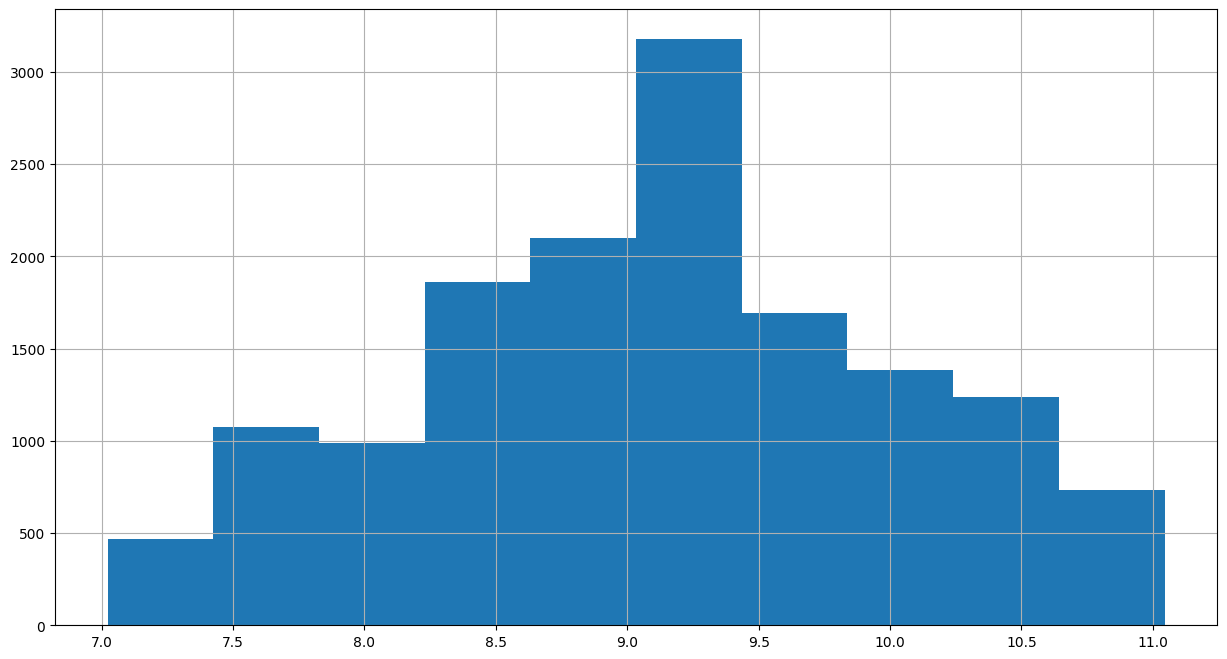

In [46]:
insurance.log_claim.hist()


plt.show()

It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test

In [47]:
# recheck normality by Jarque-Bera test
# the test returns the the test statistics and the p-value of the test
statn, pv = jarque_bera(insurance['log_claim'])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs

#4.2.2 One-Way Anova

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of claim is significantly different across gender


The null and alternate hypothesis of one-way anova are as follows:


H0: Population means all are equal

H1: Population means are not all equal


One Way Anova for 'Sex' on 'Claim'

In [48]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(insurance['claim'][insurance['sex'] == 'male'],
             insurance['claim'][insurance['sex'] == 'female'])

F_onewayResult(statistic=68.99835913263617, pvalue=1.070652488972223e-16)

The F-statistic = 68.99 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the insurance claim across gender. We may consider building separate models for each gender. However, in this example we go ahead and build a single model for both genders.

#4.2.3 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section 4.1.2, it is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.


We need to perform dummy encoding on our categorical variables before we proceed, since the method of OLS works only on numeric data

In order to dummy encode, we do the following:
1. Filter numerical and categorical variables
2. Dummy encode the catergorical variables
3. Concatenate numerical and dummy encoded categorical variables


1.Filter numerical and categorical variables

In [49]:
numeric_features = insurance.select_dtypes(include=np.number)


numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim'],
      dtype='object')

In [50]:
categorical_features = insurance.select_dtypes(include=[object])

categorical_features.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'diabetes', 'regular_ex',
       'job_title', 'region'],
      dtype='object')

2. Dummy encode the catergorical variables

In [51]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in categorical_features.columns.values:

    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(categorical_features[col], prefix=col, drop_first=True)

    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    categorical_features = pd.concat([categorical_features, dummy_encoded_variables],axis=1)

    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    categorical_features.drop([col], axis=1, inplace=True)

3. Concatenate numerical and dummy encoded categorical variables

In [52]:
insurance_dummy = pd.concat([numeric_features,categorical_features], axis=1)

insurance_dummy.head()

age  weight       bmi  no_of_dependents  bloodpressure        claim  \
0 60.000000      64 24.300000                 1             72 13112.600000   
1 49.000000      75 22.600000                 1             78  9567.000000   
2 32.000000      64 17.800000                 2             88 32734.200000   
3 61.000000      53 36.400000                 1             72 48517.600000   
4 19.000000      50 20.600000                 0             82  1731.700000   

   log_claim  sex_male  hereditary_diseases_Arthritis  \
0   9.481329      True                          False   
1   9.166075     False                          False   
2  10.396176     False                          False   
3  10.789682     False                          False   
4   7.456859     False                          False   

   hereditary_diseases_Cancer  hereditary_diseases_Diabetes  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   hereditary_diseases_Epilepsy  hereditary_diseases_EyeDisease  \
0                         False                           False   
1                         False                           False   
2                          True                           False   
3                         False                           False   
4                         False                           False   

   hereditary_diseases_HeartDisease  hereditary_diseases_High BP  \
0                             False                        False   
1                             False                        False   
2                             False                        False   
3                             False                        False   
4                             False                        False   

   hereditary_diseases_NoDisease  hereditary_diseases_Obesity  smoker_1  \
0                           True                        False     False   
1                           True                        False     False   
2                          False                        False      True   
3                           True                        False      True   
4                           True                        False     False   

   diabetes_1  regular_ex_1  job_title_Accountant  job_title_Actor  \
0       False         False                 False             True   
1        True          True                 False            False   
2        True          True                 False            False   
3        True         False                 False            False   
4        True         False                 False            False   

   job_title_Analyst  job_title_Architect  job_title_Beautician  \
0              False                False                 False   
1              False                False                 False   
2              False                False                 False   
3              False                False                 False   
4              False                False                 False   

   job_title_Blogger  job_title_Buisnessman  job_title_CA  job_title_CEO  \
0              False                  False         False          False   
1              False                  False         False          False   
2              False                  False         False          False   
3              False                  False         False          False   
4              False                  False         False          False   

   job_title_Chef  job_title_Clerks  job_title_Dancer  \
0           False             False             False   
1           False             False             False   
2           False             False             False   
3            True             False    

#5. Linear Regression (OLS)

5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.


In order to build the model, we do the following:
1. Split the data into training and test sets
2. Build model using sm.OLS().fit()
3. Predict the values using test set
4. Compute accuracy measures
5. Tabulate the results

1.Split the data into training and test sets

In [53]:
# add the intercept column to the dataset
insurance_dummy = sm.add_constant(insurance_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = insurance_dummy.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = insurance_dummy[['log_claim','claim']]

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


2. Build model using sm.OLS().fit()

In [54]:
import statsmodels.api as sm
linreg_full_model_withlog = sm.OLS(y_train["log_claim"], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_claim   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     584.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:30:39   Log-Likelihood:                -7083.9
No. Observations:               11042   AIC:                         1.428e+04
Df Residuals:                   10986   BIC:                         1.469e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


This model explains 74.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.008 and indicates that there is no autocorrelation. The Condition Number 4610 suggests that there is severe collinearity.

Condition Number : One way to assess multicollinearity is to compute the condition number(CN). If CN is less than 100, there is no multicollinearity. If CN is between 100 and 1000, there is moderate multicollinearity and if CN is greater 1000 there is severe multicollinearity in the data

Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation


3. Predict the values using test set

In [55]:
# predict the 'log_claim' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [56]:
# take the exponential of predictions using np.exp()
predicted_claim = np.exp(linreg_full_model_withlog_predictions)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

4. Compute accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [57]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj

5. Tabulate the results

In [58]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

Empty DataFrame
Columns: [Model_Name, R-Squared, Adj. R-Squared, RMSE]
Index: []

In [59]:
#compile the required information
linreg_full_model_withlog_metrics = pd.DataFrame([{
    'Model_Name': "Linreg full model with log of target variable",
    'RMSE': linreg_full_model_withlog_rmse,
    'R-Squared': linreg_full_model_withlog_rsquared,
    'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj
}])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withlog_metrics], ignore_index=True)

# print the result table
score_card


Model_Name  R-Squared  Adj. R-Squared  \
0  Linreg full model with log of target variable   0.745162        0.743886   

         RMSE  
0 7947.405055

Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable

#5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'claim' variable as it is.


We do not need to do the train and test split again since it has been done while building the previous model

In order to build the model, we do the following:
1. Build model using sm.OLS().fit()
2. Predict the values using test set
3. Compute the accuracy measures
4. Tabulate the results

1. Build model using sm.OLS().fit()

In [60]:
# ordinary least squares regression
# we use the train and test sets from the previous model
# however, now we shall build a model using the variable 'claim'

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['claim'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:30:39   Log-Likelihood:            -1.1150e+05
No. Observations:               11042   AIC:                         2.231e+05
Df Residuals:                   10986   BIC:                         2.235e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

This model explains 76.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4610 suggests that there is severe collinearity.
Calculate the p-values to know the insignificant variables

In [61]:
# calculate the p-values for all the variables
# create a dataframe using pd.DataFrame()
# columns: specifies the column names
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

P-Value
const                            0.031598
age                              0.000000
weight                           0.000000
bmi                              0.000000
no_of_dependents                 0.000000
bloodpressure                    0.000001
sex_male                         0.991378
hereditary_diseases_Arthritis    0.007119
hereditary_diseases_Cancer       0.437347
hereditary_diseases_Diabetes     0.007693
hereditary_diseases_Epilepsy     0.954165
hereditary_diseases_EyeDisease   0.010019
hereditary_diseases_HeartDisease 0.000001
hereditary_diseases_High BP      0.015253
hereditary_diseases_NoDisease    0.000000
hereditary_diseases_Obesity      0.407964
smoker_1                         0.000000
diabetes_1                       0.000000
regular_ex_1                     0.000000
job_title_Accountant             0.169622
job_title_Actor                  0.723381
job_title_Analyst                0.009621
job_title_Architect              0.098301
job_title_Beautician             0.237583
job_title_Blogger                0.159845
job_title_Buisnessman            0.912957
job_title_CA                     0.494423
job_title_CEO                    0.192397
job_title_Chef                   0.268452
job_title_Clerks                 0.099560
job_title_Dancer                 0.829865
job_title_DataScientist          0.020065
job_title_DefencePersonnels      0.109073
job_title_Doctor                 0.015459
job_title_Engineer               0.000351
job_title_Farmer                 0.925659
job_title_FashionDesigner        0.475014
job_title_FilmDirector           0.824479
job_title_FilmMaker              0.774649
job_title_GovEmployee            0.119212
job_title_HomeMakers             0.051055
job_title_HouseKeeper            0.559661
job_title_ITProfessional         0.873967
job_title_Journalist             0.780281
job_title_Labourer               0.091346
job_title_Lawyer                 0.056377
job_title_Manager                0.001158
job_title_Photographer           0.000001
job_title_Police                 0.464513
job_title_Politician             0.000078
job_title_Singer                 0.042102
job_title_Student                0.014238
job_title_Technician             0.617497
region_North-East                0.579460
region_Southern                  0.625231
region_West                      0.435553

In [62]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Labourer',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West']

These are the insignificant variables because their p-value is greater than 0.05.

Notice, the variable 'sex_male' is insignificant. It implies that a persons gender does not affect the claim. Hence, we shall consider this variable to be insignificant.

Out of the 9 hereditary diseases, there are 3 diseases which are insignificant. Considering, 'hereditary diseases' as whole we must include it in the data.

There are 25, out of the total 35, professions/designations which are insignificant. Hence, it can be considered as redundant variable.

Similarly for the variable region only 1 region is significantly contributing to the target variable. So we shall exclude the variable.
2. Predict the values using test set

In [63]:
# predict the claim using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

3. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared

In [64]:
#calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj


4. Tabulate the results

In [65]:
# Compile the required information into a DataFrame
linreg_full_model_withoutlog_metrics = pd.DataFrame([{
    'Model_Name': "Linreg full model without log of target variable",
    'RMSE': linreg_full_model_withoutlog_rmse,
    'R-Squared': linreg_full_model_withoutlog_rsquared,
    'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj
}])

# Concatenate the new row to the score_card DataFrame
score_card = pd.concat([score_card, linreg_full_model_withoutlog_metrics], ignore_index=True)

# Print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909

On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'claim' is lower than the other model. And, the RMSE value of the model without considering the log transformation is considerably lower. So, we continue with variable 'claim' as it is, instead of opting for log transformation

#5.3. Fine Tune Linear Regression Model (OLS)

#5.3.1 Linear Regression after Removing Insignificant Variable (OLS)

The null and alternate hypothesis of linear regression as follows:

H0: All beta coefficients are zero
H1: At least one beta coefficient is not zero

From the summary output of our linear regression model in section 5.2, we notice some of the variables are insignificant.

Now, we go ahead and build our next model without considering the above mentioned insignificant variables.


In order to build the linear regression model after removing insignificant variable, we do the following:
1. Consider the significant variables
2. Split the data into training and test sets
3. Build model using sm.OLS().fit()
4. Predict the values using test set
5. Compute accuracy measures
6. Tabulate the results

Note: We won't split the data into train and test set again since it has been done while building the previous model
1. Consider the significant variables

In [66]:
# drop the insignificant variables
X_significant = insurance.drop(["sex","job_title","region","claim","log_claim"], axis=1)


In [67]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
significant_categorical_features = X_significant.select_dtypes(include=[object])

# display categorical features
significant_categorical_features.columns

Index(['hereditary_diseases', 'smoker', 'diabetes', 'regular_ex'], dtype='object')

Dummy encode the catergorical variables

In [68]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in significant_categorical_features.columns.values:

    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(significant_categorical_features[col], prefix=col, drop_first=True)

    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    significant_categorical_features = pd.concat([significant_categorical_features, dummy_encoded_variables],axis=1)

    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    significant_categorical_features.drop([col], axis=1, inplace=True)

Concatenate numerical and dummy encoded categorical variables

In [69]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
insurance_significant = pd.concat([numeric_features, significant_categorical_features], axis=1)

# display data with dummy variables
insurance_significant.head()

age  weight       bmi  no_of_dependents  bloodpressure        claim  \
0 60.000000      64 24.300000                 1             72 13112.600000   
1 49.000000      75 22.600000                 1             78  9567.000000   
2 32.000000      64 17.800000                 2             88 32734.200000   
3 61.000000      53 36.400000                 1             72 48517.600000   
4 19.000000      50 20.600000                 0             82  1731.700000   

   log_claim  hereditary_diseases_Arthritis  hereditary_diseases_Cancer  \
0   9.481329                          False                       False   
1   9.166075                          False                       False   
2  10.396176                          False                       False   
3  10.789682                          False                       False   
4   7.456859                          False                       False   

   hereditary_diseases_Diabetes  hereditary_diseases_Epilepsy  \
0                         False                         False   
1                         False                         False   
2                         False                          True   
3                         False                         False   
4                         False                         False   

   hereditary_diseases_EyeDisease  hereditary_diseases_HeartDisease  \
0                           False                             False   
1                           False                             False   
2                           False                             False   
3                           False                             False   
4                           False                             False   

   hereditary_diseases_High BP  hereditary_diseases_NoDisease  \
0                        False                           True   
1                        False                           True   
2                        False                          False   
3                        False                           True   
4                        False                           True   

   hereditary_diseases_Obesity  smoker_1  diabetes_1  regular_ex_1  
0                        False     False       False         False  
1                        False     False        True          True  
2                        False      True        True          True  
3                        False      True        True         False  
4                        False     False        True         False

2. Split the data into training and test sets

In [70]:
# add the intercept column to the dataset
insurance_significant = sm.add_constant(insurance_significant)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = insurance_significant.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = insurance_significant[['log_claim','claim']]

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


1. Build model using sm.OLS().fit()

In [71]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['claim'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2064.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:30:40   Log-Likelihood:            -1.1160e+05
No. Observations:               11042   AIC:                         2.232e+05
Df Residuals:                   11024   BIC:                         2.234e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76.1% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.982 and indicates that there is no autocorrelation. The Condition Number is 3670 suggests that there is severe collinearity.
2. Predict the values using test set

In [72]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

3. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [73]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj


4. Tabulate the results

In [74]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.DataFrame([{
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_model_with_significant_var_metrics], ignore_index=True)

# print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   
2      Linreg full model with significant variables   0.760924   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909  
2        0.760555 5911.155096

Occams razor is a principle to explain the phenomena by the simplest hypothesis possible. Our last model where we have removed the insignificant variables is performimg very close to the other models inspite of having lesser number of variables. Using Occams razor principle, we accept the model in which we consider the model with significant variables

#5.3.2 Check the Assumptions of the Linear Regression
Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.


#5.3.2.1 Detecting Autocorrelation
Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows:

      H0: There is no autocorrelation in the residuals
      H1: There is autocorrelation in the residuals

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation

From the summary output in section 5.3.1, we see that the Durbin-Watson static is 1.980

Hence we can conclude that there is no autocorrelation


We can also find out the p-value associated with the Durbin-Watson statistic from Durbin_Watson table in order to reject or fail to reject the null hypothesis. Reference URL: Durbin-Watson Table

#5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:

H0: The residuals are homoskedastic

H1: The residuals are not homoskedastic

In [75]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)

[('f-value', 1015.2273076491725), ('p-value', 4.976780161261492e-205)]

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.

#5.3.2.3 Linearity of Residuals
Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.

The independent variables must have a linear relationship with the dependent variable.

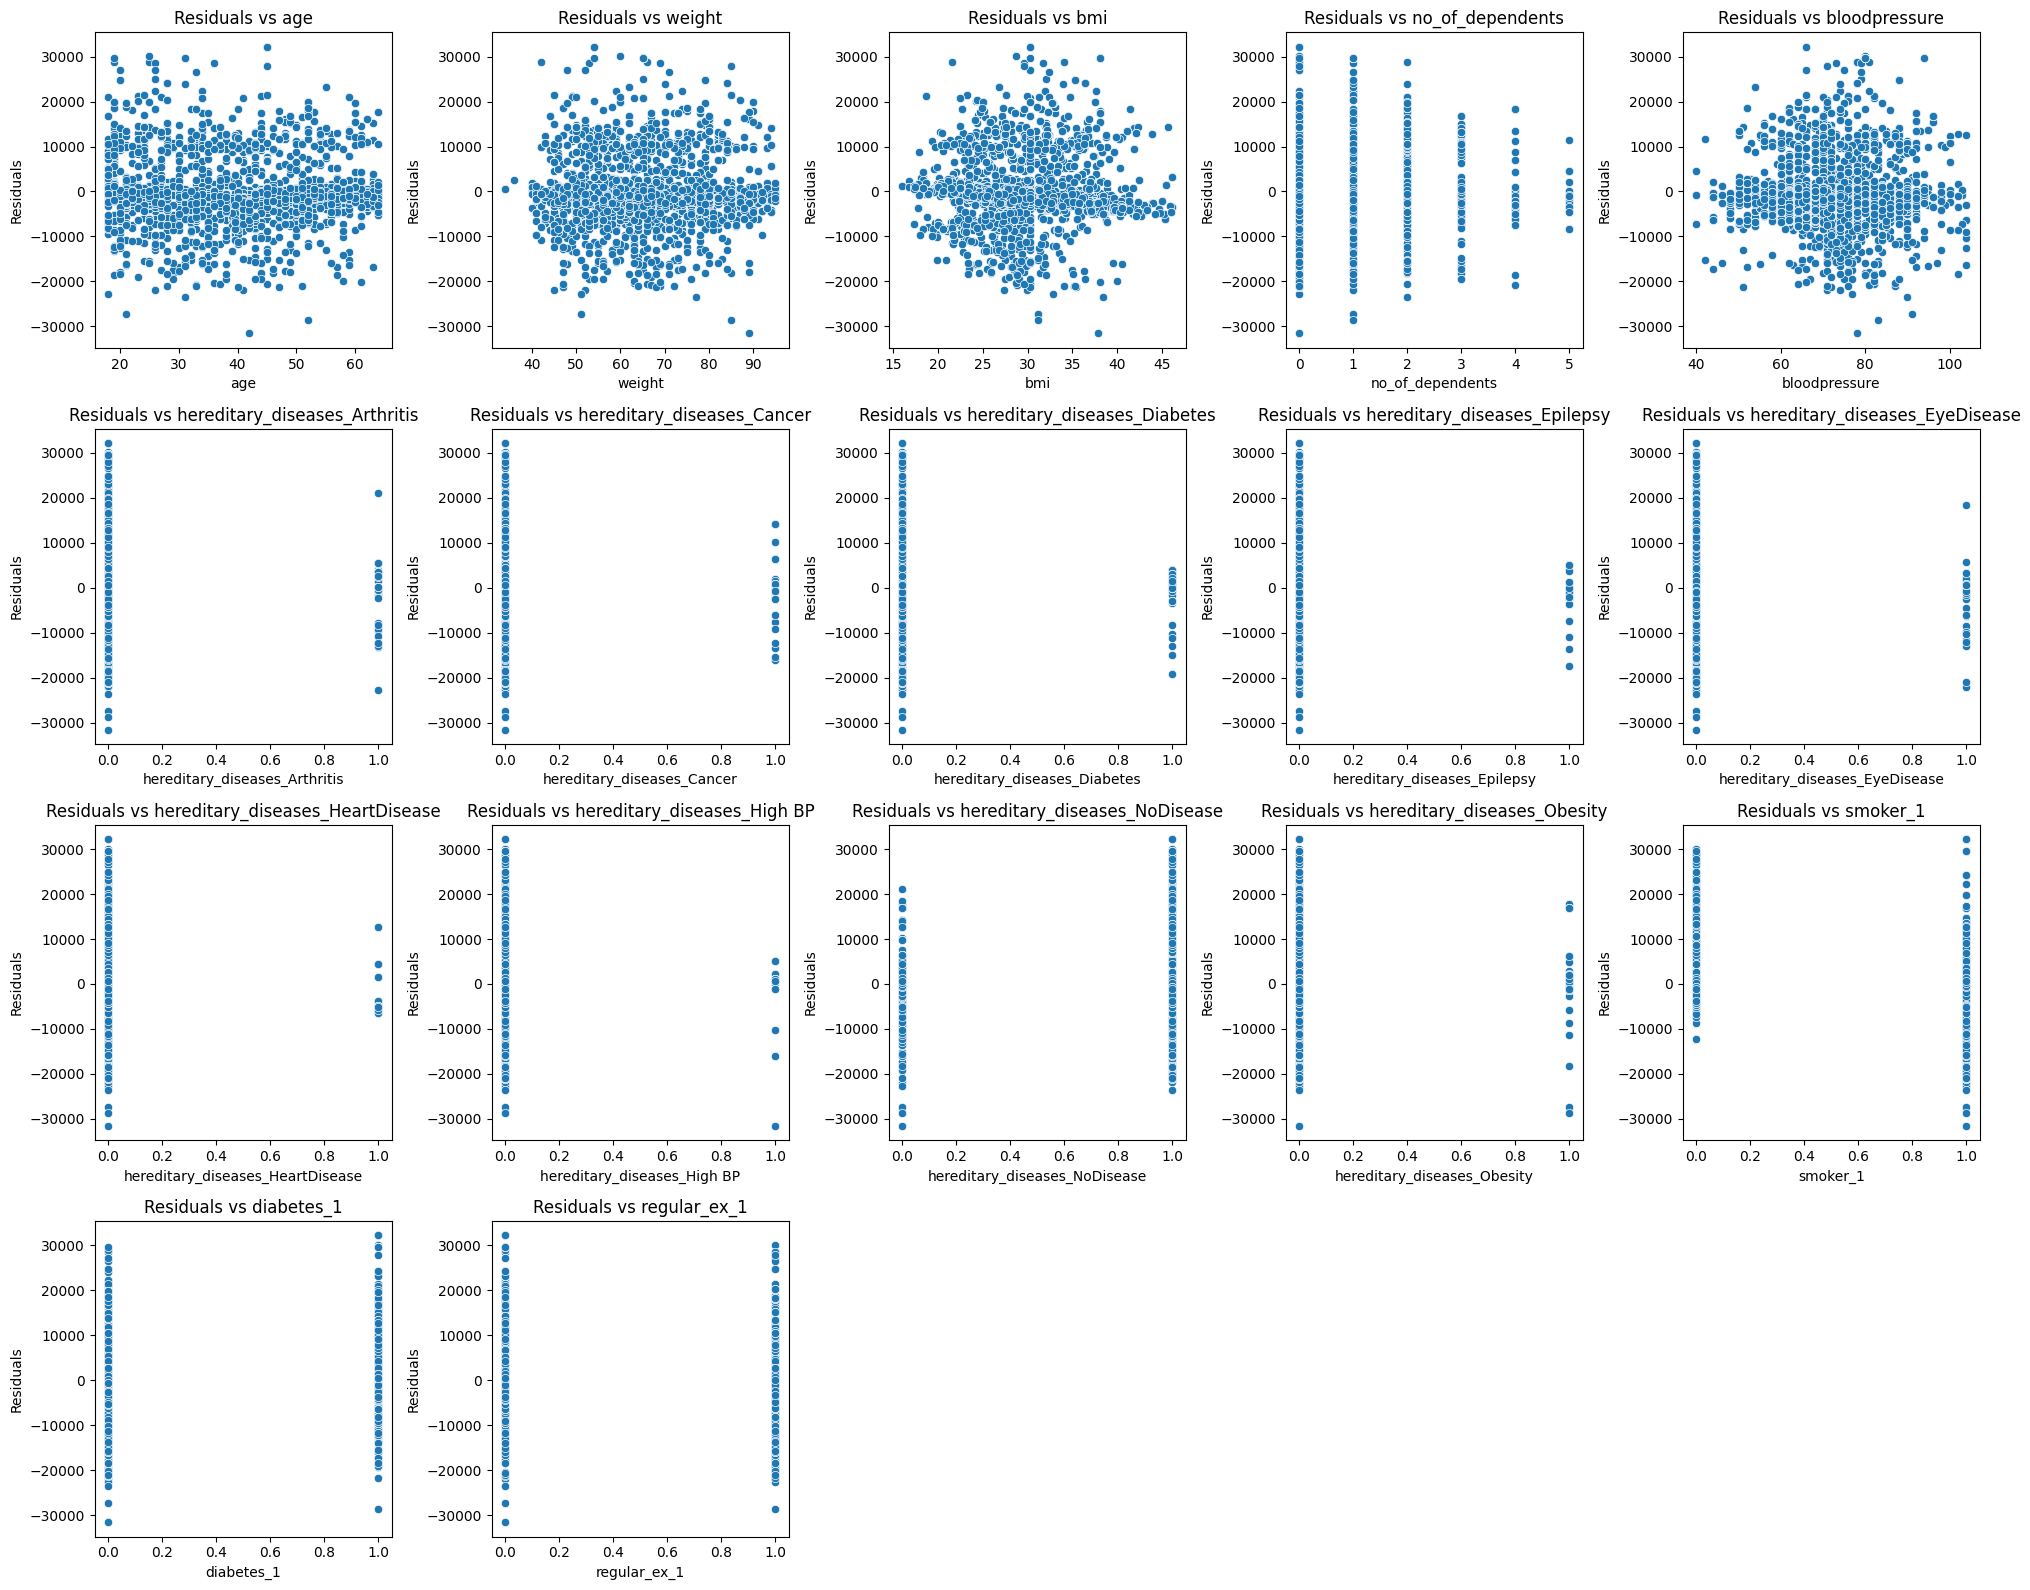

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplot grid
n_plots = len(X_train_significant.columns) - 1  # Excluding intercept
n_cols = 5  # Number of columns in the grid
n_rows = (n_plots // n_cols) + int(n_plots % n_cols > 0)  # Number of rows

# Create a subplot grid with the calculated number of rows and columns
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Create scatter plots for residuals vs. each independent variable
for variable, subplot in zip(X_train_significant.columns[1:], ax):
    sns.scatterplot(x=X_train_significant[variable], y=linreg_model_with_significant_var.resid, ax=subplot)
    subplot.set_title(f'Residuals vs {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Residuals')

# Hide any unused subplots
for i in range(n_plots, len(ax)):
    fig.delaxes(ax[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

#5.3.2.4 Normality of Residuals
The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

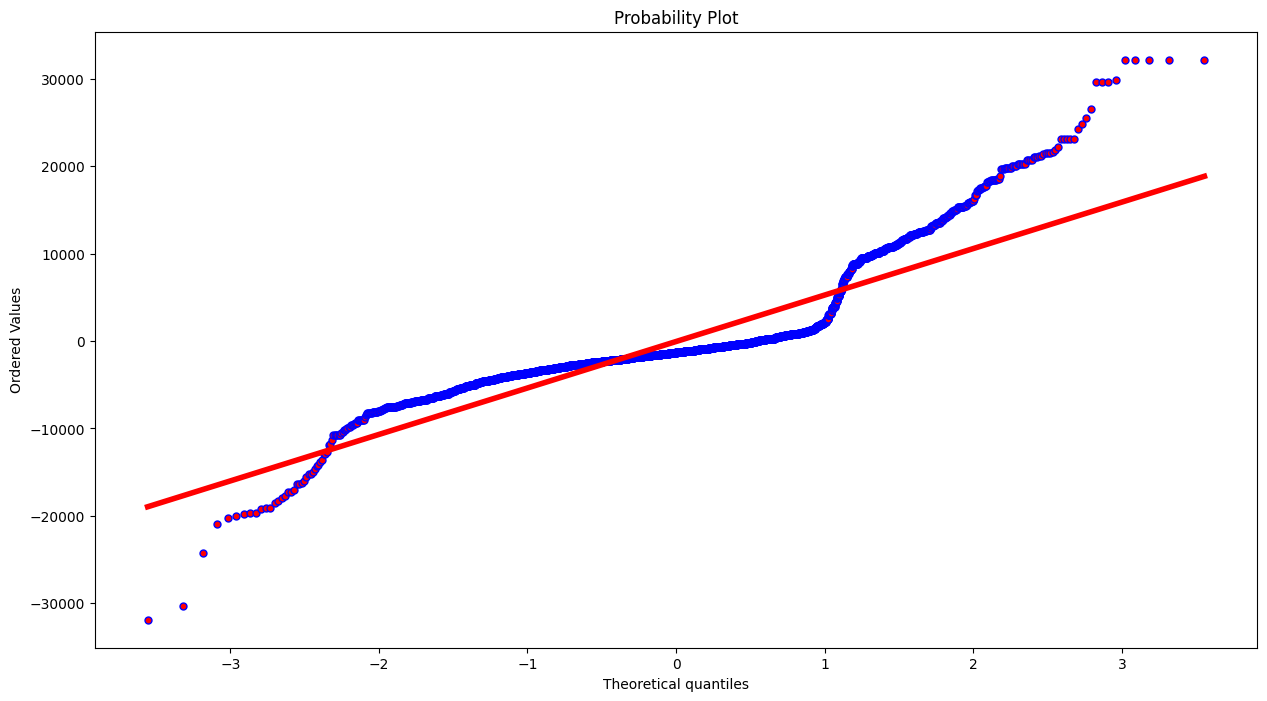

In [77]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_claim - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.


The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)

In [78]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

-6.516337623454332e-11

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

Perform Jarque Bera test to check normality of the residuals

In [79]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=4744.770, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.


#5.3.3 Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).


Let's build a model on significant variables using standardization.

To build the linear regression model after removing insignificant variable on standardized data, we do the following:
1. Perform standardization on data
2. Split the data into training and test sets
3. Consider only the significant variables
4. Build model using sm.OLS().fit()
5. Predict the values using test set
6. Compute accuracy measures
7. Tabulate the results


1. Perform standardization on train data

In [80]:
# scale the numeric variables
# apply(): applies the operaction passed to each feature in 'df_numeric_features'
# lambda(): lambda functions are anonymous, i.e. to say they have no names
# the lambda function scales the data
num_scaled = numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())

# create a dataframe
# axis=1: specifies that the concatenation is column wise
insurance_scaled = pd.concat([num_scaled, categorical_features], axis = 1)

# add constant to the data
df_insurance_scaled =sm.add_constant(insurance_scaled)

In [81]:
# on doing the predictions to compute RMSE the we need to unscale the predictions
# so we store the original mean and standard deviation of the data
# store the mean as 'mean_numeric_features'
mean_numeric_features = numeric_features.mean()

# store the standard deviation as 'std_numeric_features'
std_numeric_features = numeric_features.std()

2. Split the data into training and test sets

In [82]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = insurance_scaled.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = insurance_scaled['claim']

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train_scaled.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test_scaled.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train_scaled.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test_scaled.shape)

The shape of X_train_scaled is: (11042, 55)
The shape of X_test_scaled is: (3681, 55)
The shape of y_train_scaled is: (11042,)
The shape of y_test_scaled is: (3681,)


3. Consider only the significant variables

In [83]:
# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)

# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)

4. Build model using sm.OLS().fit()

In [84]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

                                 OLS Regression Results                                
Dep. Variable:                  claim   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              1505.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                        0.00
Time:                        02:30:47   Log-Likelihood:                         -7898.2
No. Observations:               11042   AIC:                                  1.584e+04
Df Residuals:                   11019   BIC:                                  1.601e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

This model explains 76.4% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.977 and indicates that the is no autocorrelation. The Condition Number is 20.2 suggests that there is no collinearity

5. Predict the values using test set

In [85]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

6. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [86]:
# calculate rmse using rmse()
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj


7. Tabulate the results

In [87]:
# compile the required information
linreg_model_with_significant_scaled_vars_metrics = pd.DataFrame([{
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_model_with_significant_scaled_vars_metrics], ignore_index = True)

# print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   
2      Linreg full model with significant variables   0.760924   
3          Linreg with scaled significant variables   0.758593   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909  
2        0.760555 5911.155096  
3        0.758089 5956.606689

On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model. Also the R-squared and Adj. R-squared values have slightly reduced. So, for further analysis we use the unscaled data

#5.3.4 Linear Regression with Interaction (OLS)
Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

Comparing the coefficient of determination with and without the interaction term:
The model for which interaction term is considered, the coefficient of determination may vary. It is crucial to check for the significance of the interaction term. If the term is found to be significant then the coefficient of determination increases. If the term is not significant, there is not much change in the coefficient of determination.


In order to build the model, we do the following:
1. Compute the interaction effect
2. Split the data into training and test sets
3. Build model using sm.OLS().fit()
4. Predict the values using test set
5. Compute accuracy measures
6. Tabulate the results

1.Compute the interaction effect

In [88]:
# create a copy of the entire dataset to add the interaction effect using copy()
insurance_interaction = insurance_dummy.copy()

# add the interaction variable
insurance_interaction['bmi*smoker'] = insurance_interaction['bmi']*insurance_interaction['smoker_1']

# print the data with interaction
insurance_interaction.head()

const       age  weight       bmi  no_of_dependents  bloodpressure  \
0 1.000000 60.000000      64 24.300000                 1             72   
1 1.000000 49.000000      75 22.600000                 1             78   
2 1.000000 32.000000      64 17.800000                 2             88   
3 1.000000 61.000000      53 36.400000                 1             72   
4 1.000000 19.000000      50 20.600000                 0             82   

         claim  log_claim  sex_male  hereditary_diseases_Arthritis  \
0 13112.600000   9.481329      True                          False   
1  9567.000000   9.166075     False                          False   
2 32734.200000  10.396176     False                          False   
3 48517.600000  10.789682     False                          False   
4  1731.700000   7.456859     False                          False   

   hereditary_diseases_Cancer  hereditary_diseases_Diabetes  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   hereditary_diseases_Epilepsy  hereditary_diseases_EyeDisease  \
0                         False                           False   
1                         False                           False   
2                          True                           False   
3                         False                           False   
4                         False                           False   

   hereditary_diseases_HeartDisease  hereditary_diseases_High BP  \
0                             False                        False   
1                             False                        False   
2                             False                        False   
3                             False                        False   
4                             False                        False   

   hereditary_diseases_NoDisease  hereditary_diseases_Obesity  smoker_1  \
0                           True                        False     False   
1                           True                        False     False   
2                          False                        False      True   
3                           True                        False      True   
4                           True                        False     False   

   diabetes_1  regular_ex_1  job_title_Accountant  job_title_Actor  \
0       False         False                 False             True   
1        True          True                 False            False   
2        True          True                 False            False   
3        True         False                 False            False   
4        True         False                 False            False   

   job_title_Analyst  job_title_Architect  job_title_Beautician  \
0              False                False                 False   
1              False                False                 False   
2              False                False                 False   
3              False                False                 False   
4              False                False                 False   

   job_title_Blogger  job_title_Buisnessman  job_title_CA  job_title_CEO  \
0              False                  False         False          False   
1              False                  False         False          False   
2              False                  False         False          False   
3              False                  False         False          False   
4              False                  False         False          False   

   job_title_Chef  job_title_Clerks  job_title_Dancer  \
0           False             False             False   
1           False             False             False   
2           False             False    

2. Split the data into training and test sets

Notice that there is a change in the data set. We have added a variable(bmi*smoker), we consider this data as our new data. We again spilt the data into a train and test set keeping the random_state as the same as before (please refer section 5.1 to confirm)

In [89]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = insurance_interaction.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = insurance_interaction['claim']

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


3. Build model using sm.OLS().fit()

In [90]:
 #building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     796.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        02:30:48   Log-Likelihood:            -1.1055e+05
No. Observations:               11042   AIC:                         2.212e+05
Df Residuals:                   10985   BIC:                         2.216e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 80.2% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4620 suggests that there is severe collinearity. The collinearity is likely to increase because of the interaction effect.

4. Predict the values using test set

In [91]:
# predict the 'claim' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'claim' values from the test data
actual_claim = y_test

5. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [92]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj

6. Tabulate the results

In [93]:
# compile the required information
linreg_with_interaction_metrics = pd.DataFrame([{
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_with_interaction_metrics], ignore_index = True)

# print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   
2      Linreg full model with significant variables   0.760924   
3          Linreg with scaled significant variables   0.758593   
4                           linreg_with_interaction   0.802319   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909  
2        0.760555 5911.155096  
3        0.758089 5956.606689  
4        0.801311 5547.061558

From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.

#6. Regularization (OLS)
Overfitting occurs when an algorithm fits the data too well. Specifically, overfitting occurs if the algorithm shows low bias but high variance. It is often a result of an excessively complicated model. This can be prevented by fitting multiple models and using cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when an algorithm cannot capture the underlying trend of the data. Intuitively, it occurs when the algorithm does not fit the data well enough. Specifically, it occurs if the model or algorithm shows low variance but high bias. It is often a result of an excessively simple model

One of the challenge in machine learning is that our algorithm must perform well on new, previously unseen data - not just those on which our model was trained. This ability to perform well on previously unobserved data is called generalization. Generalization error is defined as the expected value of the error on a new data. Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error. (Ref. Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville)


Now we will perform regularization to check whether this technique performs better than our linear regression models without regularization

#6.1 Ridge Regression (OLS)

Ridge regression is a technique for analyzing multiple regression data that suffers from multicollinearity

Now we perform ridge regression. We start with our original data set gradually proceeding with our analysis

In order to perform ridge regression, we do the following:
1. Split the data in the form of train and test sets
2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics
3. Find the alpha for which RMSE is minimum
4. Fit a ridge model by substituting the alpha value obtained in step 3
5. Predict the values using test set
6. Compute accuracy measures
7. Tabulate the results


1. Split the data in the form of train and test sets

We shall use the scaled data. The train test split is alread conducted for the scaled data.

2. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics

We first create a list of all the variable names and accuracy metrics whose values we want

In [94]:
# compile the column names of the output dataframe
# add the names of metrics used for comparing the models
# these metrics are used for both lasso and ridge regression

# create list of variable names
col = list(X_train_scaled.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

Fit a linear regression model by the OLS method.

In [95]:
# build a OLS model using OLS()
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted ridge model
results_fu = ridge_regression.fit()

In [96]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.1001, 0.2001, 0.3001, 0.4001, 0.5001 and 10.0001
for n in np.arange(0.0001,10.1, 0.1).tolist():

    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression,
                                             params=results_fr.params,
                                             normalized_cov_params=ridge_regression.normalized_cov_params)

    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # append the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # converting the list to a dataframe.
    params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame.
# this column will hold the regularization parameter value which can be anything from zero to any positive number
params.index.name = 'alpha*'

# display the output
params

age    weight      bmi  no_of_dependents  bloodpressure  \
alpha*                                                                   
0.000100  0.302784 -0.045515 0.106499          0.048936       0.022828   
0.100100  0.267330 -0.034169 0.111895          0.045610       0.029750   
0.200100  0.241653 -0.023828 0.109909          0.043393       0.029761   
0.300100  0.221455 -0.016061 0.106191          0.041267       0.028739   
0.400100  0.204855 -0.010162 0.101939          0.039265       0.027427   
0.500100  0.190847 -0.005627 0.097636          0.037410       0.026070   
0.600100  0.178805 -0.002101 0.093477          0.035702       0.024759   
0.700100  0.168308  0.000668 0.089541          0.034133       0.023526   
0.800100  0.159056  0.002860 0.085853          0.032690       0.022382   
0.900100  0.150826  0.004606 0.082411          0.031362       0.021326   
1.000100  0.143448  0.006005 0.079205          0.030135       0.020353   
1.100100  0.136791  0.007128 0.076219          0.029001       0.019457   
1.200100  0.130749  0.008032 0.073436          0.027948       0.018630   
1.300100  0.125238  0.008760 0.070840          0.026968       0.017867   
1.400100  0.120188  0.009345 0.068414          0.026055       0.017160   
1.500100  0.115541  0.009814 0.066143          0.025202       0.016505   
1.600100  0.111251  0.010188 0.064014          0.024403       0.015896   
1.700100  0.107276  0.010483 0.062015          0.023654       0.015329   
1.800100  0.103581  0.010713 0.060135          0.022949       0.014800   
1.900100  0.100139  0.010889 0.058364          0.022285       0.014306   
2.000100  0.096922  0.011020 0.056693          0.021658       0.013842   
2.100100  0.093910  0.011113 0.055113          0.021066       0.013407   
2.200100  0.091082  0.011174 0.053619          0.020506       0.012998   
2.300100  0.088423  0.011209 0.052203          0.019974       0.012613   
2.400100  0.085917  0.011222 0.050859          0.019470       0.012250   
2.500100  0.083551  0.011216 0.049582          0.018990       0.011907   
2.600100  0.081314  0.011194 0.048367          0.018534       0.011582   
2.700100  0.079195  0.011159 0.047210          0.018099       0.011274   
2.800100  0.077185  0.011113 0.046107          0.017684       0.010982   
2.900100  0.075276  0.011057 0.045054          0.017288       0.010705   
3.000100  0.073460  0.010993 0.044048          0.016909       0.010441   
3.100100  0.071730  0.010923 0.043086          0.016546       0.010190   
3.200100  0.070081  0.010848 0.042165          0.016199       0.009950   
3.300100  0.068507  0.010768 0.041282          0.015866       0.009722   
3.400100  0.067002  0.010684 0.040435          0.015546       0.009503   
3.500100  0.065563  0.010597 0.039623          0.015239       0.009294   
3.600100  0.064185  0.010509 0.038842          0.014944       0.009094   
3.700100  0.062864  0.010418 0.038091          0.014660       0.008903   
3.800100  0.061597  0.010325 0.037369          0.014387       0.008719   
3.900100  0.060380  0.010232 0.036674          0.014124       0.008543   
4.000100  0.059211  0.010138 0.036004          0.013870       0.008373   
4.100100  0.058086  0.010044 0.035358          0.013625       0.008210   
4.200100  0.057004  0.009950 0.034734          0.013389       0.008054   
4.300100  0.055961  0.009855 0.034133          0.013161       0.007903   
4.400100  0.054956  0.009761 0.033552          0.012940       0.007758   
4.500100  0.053987  0.009668 0.032990          0.012727       0.007618   
4.600100  0.053051  0.009574 0.032447          0.012521       0.007482   
4.700100  0.052148  0.009482 0.031921          0.012321       0.007352   
4.800100  0.051275  0.009390 0.031412          0.012128       0.007226   
4.900100  0.050431  0.009299 0.030919          0.011940       0.007104   
5.000100  0.049614  0.009209 0.030441          0.011758       0.006987   
5.100100  0.048824  0.009120 0.029978          0.011582       0.006873   
5.200100  0.048058 

Let us compare the results for low and high values of alpha

In [97]:
# call the first two rows and last two rows
params.iloc[[0,1,-2,-1]]

age    weight      bmi  no_of_dependents  bloodpressure  \
alpha*                                                                   
0.000100  0.302784 -0.045515 0.106499          0.048936       0.022828   
0.100100  0.267330 -0.034169 0.111895          0.045610       0.029750   
9.900100  0.027691  0.006035 0.017323          0.006736       0.003853   
10.000100 0.027444  0.005991 0.017172          0.006678       0.003818   

           sex_male  hereditary_diseases_Arthritis  \
alpha*                                               
0.000100   0.006986                       0.090163   
0.100100   0.049216                       0.048526   
9.900100   0.003704                       0.001269   
10.000100  0.003670                       0.001257   

           hereditary_diseases_Cancer  hereditary_diseases_Diabetes  \
alpha*                                                                
0.000100                     0.351395                      0.099773   
0.100100                     0.062367                      0.062882   
9.900100                     0.001614                      0.001878   
10.000100                    0.001598                      0.001860   

           hereditary_diseases_Epilepsy  hereditary_diseases_EyeDisease  \
alpha*                                                                    
0.000100                       0.301556                        0.105444   
0.100100                       0.048627                        0.054505   
9.900100                       0.001166                        0.001584   
10.000100                      0.001154                        0.001568   

           hereditary_diseases_HeartDisease  hereditary_diseases_High BP  \
alpha*                                                                     
0.000100                           0.656375                     0.087734   
0.100100                           0.069228                     0.035145   
9.900100                           0.001446                     0.001002   
10.000100                          0.001432                     0.000992   

           hereditary_diseases_NoDisease  hereditary_diseases_Obesity  \
alpha*                                                                  
0.000100                       -0.648343                     0.233594   
0.100100                       -0.411451                     0.078500   
9.900100                       -0.013281                     0.002150   
10.000100                      -0.013151                     0.002129   

           smoker_1  diabetes_1  regular_ex_1  job_title_Accountant  \
alpha*                                                                
0.000100   1.675640    0.124621     -0.073978              0.178891   
0.100100   1.108009    0.143675     -0.058921              0.029129   
9.900100   0.031070    0.006018     -0.002421              0.000793   
10.000100  0.030765    0.005961     -0.002398              0.000785   

           job_title_Actor  job_title_Analyst  job_title_Architect  \
alpha*                                                               
0.000100          0.103815          -0.003395             0.201633   
0.100100         -0.000397          -0.038757             0.027281   
9.900100          0.000373          -0.000697             0.000665   
10.000100         0.000370          -0.000690             0.000658   

           job_title_Beautician  job_title_Blogger  job_title_Buisnessman  \
alpha*                                                                      
0.000100               0.171422           0.053556               0.117814   
0.100100               0.003280          -0.031195               0.009222   
9.900100              -0.000012          -0.000766               0.000158   
10.000100             -0.000012          -0.000758               0.000157   

           job_title_CA  job_title_CEO  job_title_Chef  job_title_Clerks  \
alpha*                                                                     
0.000100

The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first and second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares.

3. Find the alpha for which RMSE is minimum

Now, to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [98]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = params.RMSE[params.RMSE == params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


Thus, we may say the model obtained by alpha = 0.0001 is performing the best since has the lowest root mean squared error.

In ridge regression, coefficients may tend to zero yet are never zero. This can be checked by the follwing code

In [99]:
# check for zeros in the above coefficients table
# axis=1: specifies that the apply() is to be applies column wise
params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     0
0.100100     0
0.200100     0
0.300100     0
0.400100     0
0.500100     0
0.600100     0
0.700100     0
0.800100     0
0.900100     0
1.000100     0
1.100100     0
1.200100     0
1.300100     0
1.400100     0
1.500100     0
1.600100     0
1.700100     0
1.800100     0
1.900100     0
2.000100     0
2.100100     0
2.200100     0
2.300100     0
2.400100     0
2.500100     0
2.600100     0
2.700100     0
2.800100     0
2.900100     0
3.000100     0
3.100100     0
3.200100     0
3.300100     0
3.400100     0
3.500100     0
3.600100     0
3.700100     0
3.800100     0
3.900100     0
4.000100     0
4.100100     0
4.200100     0
4.300100     0
4.400100     0
4.500100     0
4.600100     0
4.700100     0
4.800100     0
4.900100     0
5.000100     0
5.100100     0
5.200100     0
5.300100     0
5.400100     0
5.500100     0
5.600100     0
5.700100     0
5.800100     0
5.900100     0
6.000100     0
6.100100     0
6.200100     0
6.300100     0
6.400100     0
6.500100     0
6.600100     0
6.700100     0
6.800100     0
6.900100     0
7.000100     0
7.100100     0
7.200100     0
7.300100     0
7.400100     0
7.500100     0
7.600100     0
7.700100     0
7.800100     0
7.900100     0
8.000100     0
8.100100     0
8.200100     0
8.300100     0
8.400100     0
8.500100     0
8.600100     0
8.700100     0
8.800100     0
8.900100     0
9.000100     0
9.100100     0
9.200100     0
9.300100     0
9.400100     0
9.500100     0
9.600100     0
9.700100     0
9.800100     0
9.900100     0
10.000100    0
dtype: int64

For all alpha values, the corresponding value is zero which impiles there are no coefficients with value zero.


4. Fit a ridge model by substituting the alpha value obtained in step 3


We know that when aplha = 0.0001, the model performs better than other since it has the lowest RMSE and highest adjusted R- squared value. Let us now find its summary output.

In [100]:
# build a ridge model for the desired alpha
# L1_wt=0: conducts ridge regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression,
                                        params=results_fr.params,
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output
print (ridge_regression_best.summary())

                                 OLS Regression Results                                
Dep. Variable:                  claim   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              647.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                        0.00
Time:                        02:30:58   Log-Likelihood:                         -7770.2
No. Observations:               11042   AIC:                                  1.565e+04
Df Residuals:                   10987   BIC:                                  1.605e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.97 which indicates that there is no autocorrelation. The Condition Number is 57.7 suggests that there is no collinearity.

5. Predict the values using test set

In [101]:
# predict the scaled claim using predict()
predicted_claim = ridge_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

6. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [102]:
# calculate rmse using rmse()
ridge_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
ridge_regression_best_rsquared = ridge_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj

7. Tabulate the results

In [103]:
# compile the required information
ridge_regression_best_metrics = pd.DataFrame([{
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,ridge_regression_best_metrics], ignore_index = True)

# print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   
2      Linreg full model with significant variables   0.760924   
3          Linreg with scaled significant variables   0.758593   
4                           linreg_with_interaction   0.802319   
5                                  Ridge Regression   0.764126   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909  
2        0.760555 5911.155096  
3        0.758089 5956.606689  
4        0.801311 5547.061558  
5        0.762945 5926.454706

Notice: That R-squared and Adjusted R-squared values have decreased and the RMSE value has increased.

#6.2 Lasso Regression (OLS)
Lasso regression shrinks the less important variable's coefficient to zero. Thus, removing some variables completely. So, this works well for feature selection in case we have a large number of features. For lasso regression, we follow a very similar process to ridge regression.


Now we perform lasso regression. We start with our original data set and gradually proceeding with our analysis

In order to perform lasso regression, we do the following:
1. Fit a regression model using OLS method
2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics
3. Find the alpha for which RMSE is minimum
4. Fit a lasso model by substituting the alpha value obtained in step 3
5. Predict the values using test set
6. Compute accuracy measures
7. Tabulate the results


1. Fit a regression model using OLS method

In [104]:
# we use the scaled data
# build a OLS model using OLS()
lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted lasso model
results_fu = lasso_regression.fit()

2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics

In [105]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be  0.0001, 0.0002 ,0.0003, 0.0004 ,0.0005 to 0.0199
for n in np.arange(0.0001, 0.02, 0.0001).tolist():

    # fit a lasso regression to the linear model built using OLS
    # L1_wt=1: conducts lasso regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression,
                                                params=results_fr.params,
                                                normalized_cov_params=lasso_regression.normalized_cov_params)

    # calculate the rmse
    # predict the claim on test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # append the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # convert the list to a dataframe
    params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
params.index=np.arange(0.0001, 0.02, 0.0001).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
params.index.name = 'alpha*'

# display output
params

age    weight      bmi  no_of_dependents  bloodpressure  \
alpha*                                                                  
0.000100 0.302664 -0.045364 0.106506          0.048608       0.023033   
0.000200 0.302555 -0.045551 0.106819          0.048374       0.023372   
0.000300 0.302535 -0.045771 0.107276          0.047983       0.023612   
0.000400 0.302487 -0.045834 0.107344          0.047724       0.023775   
0.000500 0.301932 -0.045890 0.107605          0.047206       0.023998   
0.000600 0.301969 -0.046515 0.108431          0.047248       0.024011   
0.000700 0.301862 -0.046343 0.108594          0.046894       0.024424   
0.000800 0.301612 -0.046021 0.108575          0.046806       0.024528   
0.000900 0.301412 -0.045836 0.108548          0.046717       0.024654   
0.001000 0.301222 -0.045709 0.108528          0.046590       0.024766   
0.001100 0.301101 -0.045611 0.108494          0.046451       0.024824   
0.001200 0.300995 -0.045462 0.108487          0.046330       0.024881   
0.001300 0.300887 -0.045327 0.108462          0.046197       0.024957   
0.001400 0.300785 -0.045158 0.108484          0.046095       0.024984   
0.001500 0.300744 -0.045093 0.108431          0.045988       0.025133   
0.001600 0.300535 -0.045001 0.108540          0.045929       0.025069   
0.001700 0.300397 -0.044913 0.108584          0.045745       0.025043   
0.001800 0.300258 -0.044825 0.108628          0.045562       0.025016   
0.001900 0.300390 -0.044896 0.108822          0.045386       0.024857   
0.002000 0.300184 -0.044805 0.108865          0.045208       0.024868   
0.002100 0.299977 -0.044714 0.108908          0.045030       0.024878   
0.002200 0.299770 -0.044623 0.108951          0.044852       0.024889   
0.002300 0.299575 -0.044509 0.108984          0.044650       0.024926   
0.002400 0.299362 -0.044431 0.109032          0.044486       0.024922   
0.002500 0.299192 -0.044353 0.109136          0.044311       0.024984   
0.002600 0.298934 -0.044331 0.109119          0.044118       0.024938   
0.002700 0.298703 -0.044210 0.109149          0.043987       0.024886   
0.002800 0.298473 -0.044089 0.109179          0.043856       0.024835   
0.002900 0.298242 -0.043968 0.109209          0.043725       0.024784   
0.003000 0.298011 -0.043847 0.109239          0.043594       0.024733   
0.003100 0.297781 -0.043726 0.109268          0.043464       0.024682   
0.003200 0.297587 -0.043584 0.109305          0.043342       0.024650   
0.003300 0.297316 -0.043485 0.109328          0.043201       0.024578   
0.003400 0.297016 -0.043368 0.109347          0.043037       0.024534   
0.003500 0.296862 -0.043340 0.109390          0.042874       0.024359   
0.003600 0.296581 -0.043243 0.109423          0.042755       0.024297   
0.003700 0.296298 -0.043130 0.109417          0.042662       0.024218   
0.003800 0.296015 -0.043017 0.109411          0.042569       0.024139   
0.003900 0.294569 -0.043303 0.109615          0.042282       0.024086   
0.004000 0.294440 -0.043153 0.109590          0.042237       0.023994   
0.004100 0.294306 -0.042964 0.109544          0.042133       0.023928   
0.004200 0.294171 -0.042775 0.109498          0.042029       0.023862   
0.004300 0.294036 -0.042586 0.109452          0.041924       0.023796   
0.004400 0.293901 -0.042396 0.109406          0.041820       0.023730   
0.004500 0.293766 -0.042207 0.109360          0.041716       0.023664   
0.004600 0.293603 -0.042012 0.109323          0.041578       0.023661   
0.004700 0.293485 -0.041827 0.109271          0.041495       0.023556   
0.004800 0.293368 -0.041641 0.109219          0.041412       0.023451   
0.004900 0.293250 -0.041456 0.109167          0.041329       0.023345   
0.005000 0.293133 -0.041270 0.109115          0.041246       0.023240   
0.005100 0.293015 -0.041085 0.109063          0.041163       0.023135   
0.005200 0.292897 -0.040900 0.109011          0.041080       0.023030   
0.005300 0.292780 -0.040714 0.108959          0.040997       0.022924   

Let us compare the results for low and high values of alpha



In [106]:
# call the first two rows and last two rows
params.iloc[[0,1,-2,-1]]

age    weight      bmi  no_of_dependents  bloodpressure  \
alpha*                                                                  
0.000100 0.302664 -0.045364 0.106506          0.048608       0.023033   
0.000200 0.302555 -0.045551 0.106819          0.048374       0.023372   
0.019800 0.276830 -0.017269 0.098972          0.028263       0.008734   
0.019900 0.276722 -0.017111 0.098899          0.028174       0.008645   

          sex_male  hereditary_diseases_Arthritis  hereditary_diseases_Cancer  \
alpha*                                                                          
0.000100  0.008126                       0.107101                    0.370994   
0.000200  0.008678                       0.108210                    0.371697   
0.019800  0.000000                       0.000000                    0.000000   
0.019900  0.000000                       0.000000                    0.000000   

          hereditary_diseases_Diabetes  hereditary_diseases_Epilepsy  \
alpha*                                                                 
0.000100                      0.118600                      0.314884   
0.000200                      0.121965                      0.309513   
0.019800                      0.000000                      0.000000   
0.019900                      0.000000                      0.000000   

          hereditary_diseases_EyeDisease  hereditary_diseases_HeartDisease  \
alpha*                                                                       
0.000100                        0.124245                          0.682804   
0.000200                        0.126330                          0.678661   
0.019800                        0.000000                          0.000000   
0.019900                        0.000000                          0.000000   

          hereditary_diseases_High BP  hereditary_diseases_NoDisease  \
alpha*                                                                 
0.000100                     0.097423                      -0.612947   
0.000200                     0.090340                      -0.592929   
0.019800                     0.000000                      -0.425035   
0.019900                     0.000000                      -0.424393   

          hereditary_diseases_Obesity  smoker_1  diabetes_1  regular_ex_1  \
alpha*                                                                      
0.000100                     0.253731  1.683534    0.127599     -0.072794   
0.000200                     0.257787  1.691552    0.130524     -0.070598   
0.019800                     0.000000  1.701951    0.067134      0.000000   
0.019900                     0.000000  1.701519    0.066518      0.000000   

          job_title_Accountant  job_title_Actor  job_title_Analyst  \
alpha*                                                               
0.000100              0.133362         0.059076           0.000000   
0.000200              0.105356         0.031894           0.000000   
0.019800              0.000000         0.000000           0.000000   
0.019900              0.000000         0.000000           0.000000   

          job_title_Architect  job_title_Beautician  job_title_Blogger  \
alpha*                                                                   
0.000100             0.156167              0.124847           0.006580   
0.000200             0.127148              0.095167           0.000000   
0.019800             0.000000              0.000000           0.000000   
0.019900             0.000000              0.000000           0.000000   

          job_title_Buisnessman  job_title_CA  job_title_CEO  job_title_Chef  \
alpha*                                                                         
0.000100               0.071280      0.109927       0.145410        0.017963   
0.000200               0.042977      0.081364       0.117995        0.000000   
0.019800               0.000000      0.000000       0.000000        0.000000   
0.019900               0

The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first to the second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares


3. Find the alpha for which RMSE is minimum

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error

In [107]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = params.RMSE[params.RMSE == params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


The required alpha is 0.0001

We may say the model obtained by alpha = 0.0001 is performing the best.

In lasso regression, coefficients may be zero. This can be checked by the following code

In [108]:
# check for zeros in the above coefficients table
params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     3
0.000200     5
0.000300     7
0.000400    10
0.000500    13
0.000600    14
0.000700    17
0.000800    19
0.000900    21
0.001000    22
0.001100    24
0.001200    24
0.001300    25
0.001400    25
0.001500    29
0.001600    31
0.001700    31
0.001800    31
0.001900    33
0.002000    33
0.002100    33
0.002200    33
0.002300    34
0.002400    34
0.002500    35
0.002600    36
0.002700    36
0.002800    36
0.002900    36
0.003000    36
0.003100    36
0.003200    37
0.003300    37
0.003400    38
0.003500    39
0.003600    41
0.003700    41
0.003800    41
0.003900    42
0.004000    43
0.004100    43
0.004200    43
0.004300    43
0.004400    43
0.004500    43
0.004600    44
0.004700    44
0.004800    44
0.004900    44
0.005000    44
0.005100    44
0.005200    44
0.005300    44
0.005400    44
0.005500    44
0.005600    44
0.005700    44
0.005800    44
0.005900    44
0.006000    44
0.006100    44
0.006200    44
0.006300    44
0.006400    44
0.006500    44
0.006600    44
0.006700    45
0.006800    45
0.006900    45
0.007000    45
0.007100    45
0.007200    45
0.007300    46
0.007400    46
0.007500    46
0.007600    46
0.007700    46
0.007800    46
0.007900    46
0.008000    46
0.008100    46
0.008200    46
0.008300    46
0.008400    46
0.008500    46
0.008600    46
0.008700    46
0.008800    46
0.008900    46
0.009000    46
0.009100    46
0.009200    46
0.009300    46
0.009400    46
0.009500    46
0.009600    46
0.009700    46
0.009800    46
0.009900    46
0.010000    46
0.010100    46
0.010200    46
0.010300    46
0.010400    46
0.010500    46
0.010600    46
0.010700    46
0.010800    46
0.010900    46
0.011000    46
0.011100    46
0.011200    46
0.011300    46
0.011400    47
0.011500    47
0.011600    47
0.011700    47
0.011800    47
0.011900    47
0.012000    47
0.012100    47
0.012200    47
0.012300    47
0.012400    47
0.012500    47
0.012600    47
0.012700    47
0.012800    47
0.012900    47
0.013000    47
0.013100    47
0.013200    47
0.013300    47
0.013400    47
0.013500    47
0.013600    47
0.013700    47
0.013800    47
0.013900    47
0.014000    47
0.014100    47
0.014200    47
0.014300    47
0.014400    47
0.014500    47
0.014600    47
0.014700    47
0.014800    47
0.014900    47
0.015000    47
0.015100    47
0.015200    47
0.015300    47
0.015400    47
0.015500    47
0.015600    47
0.015700    47
0.015800    47
0.015900    47
0.016000    47
0.016100    47
0.016200    47
0.016300    47
0.016400    47
0.016500    47
0.016600    47
0.016700    47
0.016800    47
0.016900    47
0.017000    47
0.017100    47
0.017200    47
0.017300    47
0.017400    47
0.017500    47
0.017600    47
0.017700    47
0.017800    47
0.017900    47
0.018000    47
0.018100    47
0.018200    47
0.018300    47
0.018400    47
0.018500    47
0.018600    47
0.018700    47
0.018800    47
0.018900    47
0.019000    47
0.019100    47
0.019200    47
0.019300    47
0.019400    47
0.019500    47
0.019600    47
0.019700    47
0.019800    47
0.019900    47
dtype: int64

For all alpha values, the corresponding value is zero which implies there are no coefficients with value zero. This happened since the number of variables considered in the data are less. Also only significant variables are considered. However, if we had considered a dataset with many variables (both significant and insignificant) then lasso regression and ridge regression would have shown significant performance.

4. Fit a lasso model by substituting the alpha value obtained in step 3

In [109]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression,
                                              params=results_fr.params,
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

                                 OLS Regression Results                                
Dep. Variable:                  claim   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              646.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                        0.00
Time:                        02:34:20   Log-Likelihood:                         -7773.6
No. Observations:               11042   AIC:                                  1.566e+04
Df Residuals:                   10987   BIC:                                  1.606e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.97 and indicates that the is no autocorrelation. The Condition Number is 57.7 suggests that there is no collinearity.

5. Predict the values using test set

In [110]:
# predict the 'claim' using predict()
predicted_claim = lasso_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

6. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [111]:
# calculate rmse using rmse()
lasso_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
lasso_regression_best_rsquared = lasso_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj

7. Tabulate the results

In [112]:
# compile the required information
lasso_regression_best_metrics = pd.DataFrame([{
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,lasso_regression_best_metrics], ignore_index = True)

# print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   
2      Linreg full model with significant variables   0.760924   
3          Linreg with scaled significant variables   0.758593   
4                           linreg_with_interaction   0.802319   
5                                  Ridge Regression   0.764126   
6                                  Lasso Regression   0.763978   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909  
2        0.760555 5911.155096  
3        0.758089 5956.606689  
4        0.801311 5547.061558  
5        0.762945 5926.454706  
6        0.762796 5926.082564

Notice that RMSE, R-squared and Adjusted R-squared values are the nearly same for ridge and lasso regression.

#6.3 Elastic Net Regression (OLS)
In statistics, fitting of linear regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The model is trained using both L1 & L2 that allows learning of sparse model where few entries are zero similar to Lasso and also maintaining the regularization properties similar to ridge regression.

Now we perform elastic net regression. We start with our original data set and gradually proceeding with our analysis

In order to perform elastic net regression, we do the following:
1. Fit a regression model using OLS method
2. Use GridsearchCV to find the best penalty term
3. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics
4. Find the alpha for which RMSE is minimum
5. Fit a elastic net model by substituting the alpha value obtained in step 4
6. Predict the values using test set
7. Compute accuracy measures
8. Tabulate the results

1.Fit a regression model using OLS method

In [113]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

2. Use GridsearchCV to find the best penalty term

When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso. Elastic net is somewhere between 0 and 1 when setting the l1_ratio. Therefore, in our grid, we need to set several values of this argument. Below is the code.

In [114]:
# normalize the data which is required for elastic net
elastic = ElasticNet()

# use gridsearchCV to find best penalty term
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic,
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error',
                      n_jobs=1,
                      refit=True,
                      cv=10)

In [115]:
# fit the model to get best parameter
search.fit(X_train_scaled, y_train_scaled)

# get best parameter
search.best_params_

{'l1_ratio': 0.2}

3. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics

In [116]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.0101, 0.0201 and 1.9901
for n in np.arange(0.0001, 1.5, 0.01).tolist():

    # fitting a elastic net regression to the elastic net model built using OLS
    # the l1_ratio is the same as l1_wt in the below function
    # L1_wt=0.8: conducts elastic net regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net',
                                                        L1_wt= 0.2,
                                                        alpha=n,
                                                        start_params=results_fu.params)

    # obtaining the parameters of the fitted model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression,
                                    params=results_fr.params,
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)

    # calculate rmse
    # call the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtaining the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compiling the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # appending the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # converting the list to a dataframe
    params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
params.index=np.arange(0.0001, 1.5, 0.01).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
params.index.name = 'alpha*'

# display output
params


age    weight      bmi  no_of_dependents  bloodpressure  \
alpha*                                                                  
0.000100 0.302764 -0.045483 0.106488          0.048862       0.022857   
0.010100 0.296370 -0.043589 0.109248          0.045044       0.025736   
0.020100 0.289127 -0.040132 0.109678          0.042000       0.024905   
0.030100 0.282798 -0.035742 0.108859          0.040072       0.023253   
0.040100 0.277707 -0.031045 0.107708          0.038306       0.021490   
0.050100 0.272723 -0.026412 0.106453          0.036561       0.019698   
0.060100 0.267869 -0.021893 0.105133          0.034818       0.017913   
0.070100 0.263143 -0.017485 0.103743          0.033070       0.016197   
0.080100 0.258553 -0.013207 0.102245          0.031286       0.014730   
0.090100 0.254146 -0.009272 0.100610          0.029484       0.013207   
0.100100 0.248618  0.000000 0.097938          0.027136       0.011631   
0.110100 0.245252  0.000000 0.096944          0.025746       0.010133   
0.120100 0.241946  0.000000 0.095903          0.024356       0.008633   
0.130100 0.238698  0.000000 0.094822          0.022967       0.007133   
0.140100 0.235504  0.000000 0.093704          0.021581       0.005634   
0.150100 0.232362  0.000000 0.092554          0.020198       0.004138   
0.160100 0.229331  0.000000 0.091231          0.018880       0.000000   
0.170100 0.226254  0.000000 0.090109          0.017472       0.000000   
0.180100 0.223225  0.000000 0.088963          0.016070       0.000000   
0.190100 0.220242  0.000000 0.087796          0.014676       0.000000   
0.200100 0.217303  0.000000 0.086611          0.013288       0.000000   
0.210100 0.214407  0.000000 0.085410          0.011909       0.000000   
0.220100 0.211552  0.000000 0.084194          0.010538       0.000000   
0.230100 0.208738  0.000000 0.082967          0.009175       0.000000   
0.240100 0.205962  0.000000 0.081729          0.007822       0.000000   
0.250100 0.203222  0.000000 0.080474          0.006474       0.000000   
0.260100 0.200456  0.000000 0.079038          0.005053       0.000000   
0.270100 0.197728  0.000000 0.077606          0.003645       0.000000   
0.280100 0.195037  0.000000 0.076177          0.002251       0.000000   
0.290100 0.192424  0.000000 0.074778          0.000000       0.000000   
0.300100 0.189743  0.000000 0.073318          0.000000       0.000000   
0.310100 0.187098  0.000000 0.071864          0.000000       0.000000   
0.320100 0.184489  0.000000 0.070417          0.000000       0.000000   
0.330100 0.181914  0.000000 0.068976          0.000000       0.000000   
0.340100 0.179373  0.000000 0.067543          0.000000       0.000000   
0.350100 0.176864  0.000000 0.066117          0.000000       0.000000   
0.360100 0.174387  0.000000 0.064699          0.000000       0.000000   
0.370100 0.171941  0.000000 0.063288          0.000000       0.000000   
0.380100 0.169526  0.000000 0.061886          0.000000       0.000000   
0.390100 0.167141  0.000000 0.060492          0.000000       0.000000   
0.400100 0.164784  0.000000 0.059106          0.000000       0.000000   
0.410100 0.162457  0.000000 0.057729          0.000000       0.000000   
0.420100 0.160157  0.000000 0.056360          0.000000       0.000000   
0.430100 0.157885  0.000000 0.055000          0.000000       0.000000   
0.440100 0.155639  0.000000 0.053649          0.000000       0.000000   
0.450100 0.153420  0.000000 0.052306          0.000000       0.000000   
0.460100 0.151227  0.000000 0.050973          0.000000       0.000000   
0.470100 0.149058  0.000000 0.049648          0.000000       0.000000   
0.480100 0.146915  0.000000 0.048333          0.000000       0.000000   
0.490100 0.144796  0.000000 0.047026          0.000000       0.000000   
0.500100 0.142700  0.000000 0.045729          0.000000       0.000000   
0.510100 0.140628  0.000000 0.044441          0.000000       0.000000   
0.520100 0.138579  0.000000 0.043161          0.000000       0.000000   

In [117]:
# to call the first two rows and last two rows
params.iloc[[0,1,-2,-1]]

age    weight      bmi  no_of_dependents  bloodpressure  \
alpha*                                                                  
0.000100 0.302764 -0.045483 0.106488          0.048862       0.022857   
0.010100 0.296370 -0.043589 0.109248          0.045044       0.025736   
1.480100 0.005441  0.000000 0.000000          0.000000       0.000000   
1.490100 0.004508  0.000000 0.000000          0.000000       0.000000   

          sex_male  hereditary_diseases_Arthritis  hereditary_diseases_Cancer  \
alpha*                                                                          
0.000100  0.007320                       0.091412                    0.353323   
0.010100  0.023889                       0.000000                    0.069643   
1.480100  0.000000                       0.000000                    0.000000   
1.490100  0.000000                       0.000000                    0.000000   

          hereditary_diseases_Diabetes  hereditary_diseases_Epilepsy  \
alpha*                                                                 
0.000100                      0.101449                      0.302285   
0.010100                      0.000000                      0.000000   
1.480100                      0.000000                      0.000000   
1.490100                      0.000000                      0.000000   

          hereditary_diseases_EyeDisease  hereditary_diseases_HeartDisease  \
alpha*                                                                       
0.000100                        0.107116                          0.659608   
0.010100                        0.000000                          0.168034   
1.480100                        0.000000                          0.000000   
1.490100                        0.000000                          0.000000   

          hereditary_diseases_High BP  hereditary_diseases_NoDisease  \
alpha*                                                                 
0.000100                     0.087602                      -0.643456   
0.010100                     0.000000                      -0.544818   
1.480100                     0.000000                       0.000000   
1.490100                     0.000000                       0.000000   

          hereditary_diseases_Obesity  smoker_1  diabetes_1  regular_ex_1  \
alpha*                                                                      
0.000100                     0.235456  1.677054    0.125129     -0.073777   
0.010100                     0.067093  1.677547    0.164324     -0.053389   
1.480100                     0.000000  0.012688    0.000000      0.000000   
1.490100                     0.000000  0.011176    0.000000      0.000000   

          job_title_Accountant  job_title_Actor  job_title_Analyst  \
alpha*                                                               
0.000100              0.171857         0.096936           0.000000   
0.010100              0.000000         0.000000           0.000000   
1.480100              0.000000         0.000000           0.000000   
1.490100              0.000000         0.000000           0.000000   

          job_title_Architect  job_title_Beautician  job_title_Blogger  \
alpha*                                                                   
0.000100             0.194582              0.164196           0.046242   
0.010100             0.000000              0.000000           0.000000   
1.480100             0.000000              0.000000           0.000000   
1.490100             0.000000              0.000000           0.000000   

          job_title_Buisnessman  job_title_CA  job_title_CEO  job_title_Chef  \
alpha*                                                                         
0.000100               0.110613      0.148287       0.182566        0.058263   
0.010100               0.000000      0.000000       0.000000        0.000000   
1.480100               0.000000      0.000000       0.000000        0.000000   
1.490100               0

4. Find the alpha for which RMSE is minimum

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [118]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = params.RMSE[params.RMSE == params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


We may say the model obtained by alpha = 0.0001 is performing the best.

In elastic net regression, coefficients may be zero. This can be checked by the following code.

In [119]:
#check for zeros in the above coefficients table
params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     1
0.010100    32
0.020100    41
0.030100    44
0.040100    45
0.050100    45
0.060100    45
0.070100    46
0.080100    47
0.090100    47
0.100100    48
0.110100    48
0.120100    48
0.130100    48
0.140100    48
0.150100    48
0.160100    49
0.170100    49
0.180100    49
0.190100    49
0.200100    49
0.210100    49
0.220100    49
0.230100    49
0.240100    49
0.250100    50
0.260100    50
0.270100    50
0.280100    50
0.290100    51
0.300100    51
0.310100    51
0.320100    51
0.330100    51
0.340100    51
0.350100    51
0.360100    51
0.370100    51
0.380100    51
0.390100    51
0.400100    51
0.410100    51
0.420100    51
0.430100    51
0.440100    51
0.450100    51
0.460100    51
0.470100    51
0.480100    51
0.490100    51
0.500100    51
0.510100    51
0.520100    51
0.530100    51
0.540100    51
0.550100    51
0.560100    51
0.570100    51
0.580100    51
0.590100    51
0.600100    51
0.610100    51
0.620100    51
0.630100    51
0.640100    51
0.650100    51
0.660100    51
0.670100    51
0.680100    51
0.690100    51
0.700100    51
0.710100    51
0.720100    51
0.730100    51
0.740100    51
0.750100    51
0.760100    51
0.770100    51
0.780100    51
0.790100    52
0.800100    52
0.810100    52
0.820100    52
0.830100    52
0.840100    52
0.850100    52
0.860100    52
0.870100    53
0.880100    53
0.890100    53
0.900100    53
0.910100    53
0.920100    53
0.930100    53
0.940100    53
0.950100    53
0.960100    53
0.970100    53
0.980100    53
0.990100    53
1.000100    53
1.010100    53
1.020100    53
1.030100    53
1.040100    53
1.050100    53
1.060100    53
1.070100    53
1.080100    53
1.090100    53
1.100100    53
1.110100    53
1.120100    53
1.130100    53
1.140100    53
1.150100    53
1.160100    53
1.170100    53
1.180100    53
1.190100    53
1.200100    53
1.210100    53
1.220100    53
1.230100    53
1.240100    53
1.250100    53
1.260100    53
1.270100    53
1.280100    53
1.290100    53
1.300100    53
1.310100    53
1.320100    53
1.330100    53
1.340100    53
1.350100    53
1.360100    53
1.370100    53
1.380100    53
1.390100    53
1.400100    53
1.410100    53
1.420100    53
1.430100    53
1.440100    53
1.450100    53
1.460100    53
1.470100    53
1.480100    53
1.490100    53
dtype: int64

Apart from the expected inference of higher RMSE for higher alphas, we can see the many of the coefficients are zero even for very small values of alpha.
For all alpha values, the corresponding value is the number of coefficients which implies there are coefficients with value zero.

5. Fit a elastic net model by substituting the alpha value obtained in step 4

In [120]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net',
                                                    L1_wt=0.2,
                                                    alpha= 0.0001,
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression,
                                              params=results_fr.params,
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                                 OLS Regression Results                                
Dep. Variable:                  claim   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              647.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                        0.00
Time:                        02:35:05   Log-Likelihood:                         -7770.4
No. Observations:               11042   AIC:                                  1.565e+04
Df Residuals:                   10987   BIC:                                  1.605e+04
Df Model:                          55                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.97 and indicates that the is no autocorrelation. The Condition Number is 57.7 suggests that there is severe collinearity.

6. Predict the values using test set

In [121]:
# predict the 'claim' using predict()
predicted_claim = elastic_net_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

7. Compute model accuracy measures

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [122]:
# calculate rmse using rmse()
elastic_net_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj

8. Tabulate the results

In [123]:
# compile the required information
elastic_net_regression_best_metrics = pd.DataFrame([{
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,elastic_net_regression_best_metrics], ignore_index = True)

# print the result table
score_card

Model_Name  R-Squared  \
0     Linreg full model with log of target variable   0.745162   
1  Linreg full model without log of target variable   0.765424   
2      Linreg full model with significant variables   0.760924   
3          Linreg with scaled significant variables   0.758593   
4                           linreg_with_interaction   0.802319   
5                                  Ridge Regression   0.764126   
6                                  Lasso Regression   0.763978   
7                            Elastic net Regression   0.764115   

   Adj. R-Squared        RMSE  
0        0.743886 7947.405055  
1        0.764249 5916.234909  
2        0.760555 5911.155096  
3        0.758089 5956.606689  
4        0.801311 5547.061558  
5        0.762945 5926.454706  
6        0.762796 5926.082564  
7        0.762935 5926.174902

Notice that RMSE, R-squared and Adjusted R-squared values are very close for the ridge, lasso, and elastic net regression.

#7. Stochastic Gradient Descent - SGD

Gradient Descent is an optimization technique in machine learning. It is an iterative method which is used to find the values of the parameters of a function that minimizes the cost function. The parameters are initially specified and from that, Gradient Descent is run in an iterative way to find the optimal values of the parameters.

For gradient decent we use the complete dataset to get the optimal in a less noisy or less random manner. But the problem arises when our datasets get really huge, say you have a million samples in your dataset, it becomes computationally very expensive to perform. This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample to perform each iteration. The sample is randomly shuffled and selected for performing the iteration. Here, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the optima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter because the path taken by the algorithm is not considered, as long as we reach the optima with significantly shorter training time.


#7.1 Linear Regression with SGD
Let us now perform linear regression using SGD.


Now we perform Linear Regression using Stochastic Gradient Descent. We start with our original data set gradually proceeding with our analysis

In order to perform Linear Regression using Stochastic Gradient Descent, we do the following:
1. Create the train and test sets
2. Fit the linear regression using the SGD
3. Predict the values using test set
4. Compute accuracy measures
5. Tabulate the results

1.Create the train and test sets

We use the orginal unscaled data.

The data is already split as train and training set.

2. Fit the linear regression using the SGD

In [124]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

3. Predict the values using test set

In [125]:
# we use predict() to predict our values
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

4. Compute accuracy measures

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [126]:
# calculate mse
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)


5. Tabulate the results

In [127]:
# compile the required information
linreg_full_model_SGD = pd.DataFrame([{
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_SGD], ignore_index = True)

# print the result table
score_card

Model_Name               R-Squared  \
0     Linreg full model with log of target variable                0.745162   
1  Linreg full model without log of target variable                0.765424   
2      Linreg full model with significant variables                0.760924   
3          Linreg with scaled significant variables                0.758593   
4                           linreg_with_interaction                0.802319   
5                                  Ridge Regression                0.764126   
6                                  Lasso Regression                0.763978   
7                            Elastic net Regression                0.764115   
8                             Linear Regression SGD -384111249328149.875000   

           Adj. R-Squared                RMSE  
0                0.743886         7947.405055  
1                0.764249         5916.234909  
2                0.760555         5911.155096  
3                0.758089         5956.606689  
4                0.801311         5547.061558  
5                0.762945         5926.454706  
6                0.762796         5926.082564  
7                0.762935         5926.174902  
8 -390046743247127.937500 230949541724.347687

Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good

Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable

Now we will perform the analysis using GridSearchCV.

#7.2 Linear Regression with SGD using GridSearchCV
Now we show how a linear model is optimized by cross-validation, which is done using the 'sklearn.model_selection.GridSearchCV' object on a training set.

The performance of the selected hyper-parameters and trained model is then measured on the test set that was not used during the model building.


Now we perform Linear Regression using Stochastic Gradient Descent with GridSearchCV. We start with our original data set gradually proceeding with our analysis

In order to perform Linear Regression using Stochastic Gradient Descent with GridSearchCV, we do the following:
1. Fit the linear regression using the SGD with GridSearchCV
2. Predict the values using test set
3. Compute accuracy measures
4. Tabulate the results

1.Fit the linear regression using the SGD with GridSearchCV

In [128]:
# to supress the warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import gridsearchcv from sklearn to optimize best parameter
from sklearn.model_selection import GridSearchCV

# Grid search

# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares,

# "l2": L2 norm penalty on coefficients (ridge regression),
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1

# The learning rate can be either constant or gradually decaying

param_grid = { 'alpha': 10.0 ** -np.arange(1, 7),

               'loss': ['squared_error'],

               'penalty': ['l2', 'l1', 'elasticnet'],

               'learning_rate': ['constant', 'optimal', 'invscaling']
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(estimator=linreg_with_SGD, param_grid=param_grid)

# fit the model on train data
clf.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_error'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

Let us print the optimal parameters obtained by using GridSearchCV.

In [129]:
# print the best parameters
# print best alpha value
print('Best alpha:', clf.best_estimator_.alpha)

# print best tolerance
print('Best tol:', clf.best_estimator_.tol)

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', clf.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', clf.best_estimator_.learning_rate)

Best alpha: 0.01
Best tol: 0.001
Best eta0: 0.01
Best learning rate: optimal


We have obtained the optimal parameters. Now substituting these values in SGDRegressor() we build the model.

In [130]:
# build the model using best parameters
# squared_loss: ordinary least squares loss
# 'eta0': specify the starting learning
linreg_SGD_using_best_parameter = SGDRegressor(alpha=1e-06,
                                               eta0=0.01,
                                               learning_rate='optimal')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train,y_train)

SGDRegressor(alpha=1e-06, learning_rate='optimal')

2. Predict the values using test set

In [131]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test)


3. Compute accuracy measures

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared

In [132]:
# calculate mse
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)


4. Tabulate the results

In [133]:
# compile the required information
linreg_full_model_SGD = pd.DataFrame([{
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_SGD], ignore_index = True)

# print the result table
score_card

Model_Name  \
0     Linreg full model with log of target variable   
1  Linreg full model without log of target variable   
2      Linreg full model with significant variables   
3          Linreg with scaled significant variables   
4                           linreg_with_interaction   
5                                  Ridge Regression   
6                                  Lasso Regression   
7                            Elastic net Regression   
8                             Linear Regression SGD   
9                             Linear Regression SGD   

                        R-Squared                  Adj. R-Squared  \
0                        0.745162                        0.743886   
1                        0.765424                        0.764249   
2                        0.760924                        0.760555   
3                        0.758593                        0.758089   
4                        0.802319                        0.801311   
5                        0.764126                        0.762945   
6                        0.763978                        0.762796   
7                        0.764115                        0.762935   
8         -384111249328149.875000         -390046743247127.937500   
9 -19039943695196324102144.000000 -19334159160685008781312.000000   

                     RMSE  
0             7947.405055  
1             5916.234909  
2             5911.155096  
3             5956.606689  
4             5547.061558  
5             5926.454706  
6             5926.082564  
7             5926.174902  
8     230949541724.347687  
9 1626003295624606.500000

Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good.

Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable.



#8. Conclusion and Interpretation
To take the final conclusion, let us recall the result table again

In [134]:
# view the result table
score_card


Model_Name  \
0     Linreg full model with log of target variable   
1  Linreg full model without log of target variable   
2      Linreg full model with significant variables   
3          Linreg with scaled significant variables   
4                           linreg_with_interaction   
5                                  Ridge Regression   
6                                  Lasso Regression   
7                            Elastic net Regression   
8                             Linear Regression SGD   
9                             Linear Regression SGD   

                        R-Squared                  Adj. R-Squared  \
0                        0.745162                        0.743886   
1                        0.765424                        0.764249   
2                        0.760924                        0.760555   
3                        0.758593                        0.758089   
4                        0.802319                        0.801311   
5                        0.764126                        0.762945   
6                        0.763978                        0.762796   
7                        0.764115                        0.762935   
8         -384111249328149.875000         -390046743247127.937500   
9 -19039943695196324102144.000000 -19334159160685008781312.000000   

                     RMSE  
0             7947.405055  
1             5916.234909  
2             5911.155096  
3             5956.606689  
4             5547.061558  
5             5926.454706  
6             5926.082564  
7             5926.174902  
8     230949541724.347687  
9 1626003295624606.500000

From the table we exclude 'Linear Regression SGD' and 'Linear regression SGD using best parameters' models since its outputs are uninterpretable.

In [135]:
# drop rows 8 and 9 from above table
score_card = score_card.drop(score_card.index[[7, 8]])
score_card

Model_Name  \
0     Linreg full model with log of target variable   
1  Linreg full model without log of target variable   
2      Linreg full model with significant variables   
3          Linreg with scaled significant variables   
4                           linreg_with_interaction   
5                                  Ridge Regression   
6                                  Lasso Regression   
9                             Linear Regression SGD   

                        R-Squared                  Adj. R-Squared  \
0                        0.745162                        0.743886   
1                        0.765424                        0.764249   
2                        0.760924                        0.760555   
3                        0.758593                        0.758089   
4                        0.802319                        0.801311   
5                        0.764126                        0.762945   
6                        0.763978                        0.762796   
9 -19039943695196324102144.000000 -19334159160685008781312.000000   

                     RMSE  
0             7947.405055  
1             5916.234909  
2             5911.155096  
3             5956.606689  
4             5547.061558  
5             5926.454706  
6             5926.082564  
9 1626003295624606.500000

Let visualize graphically the above table

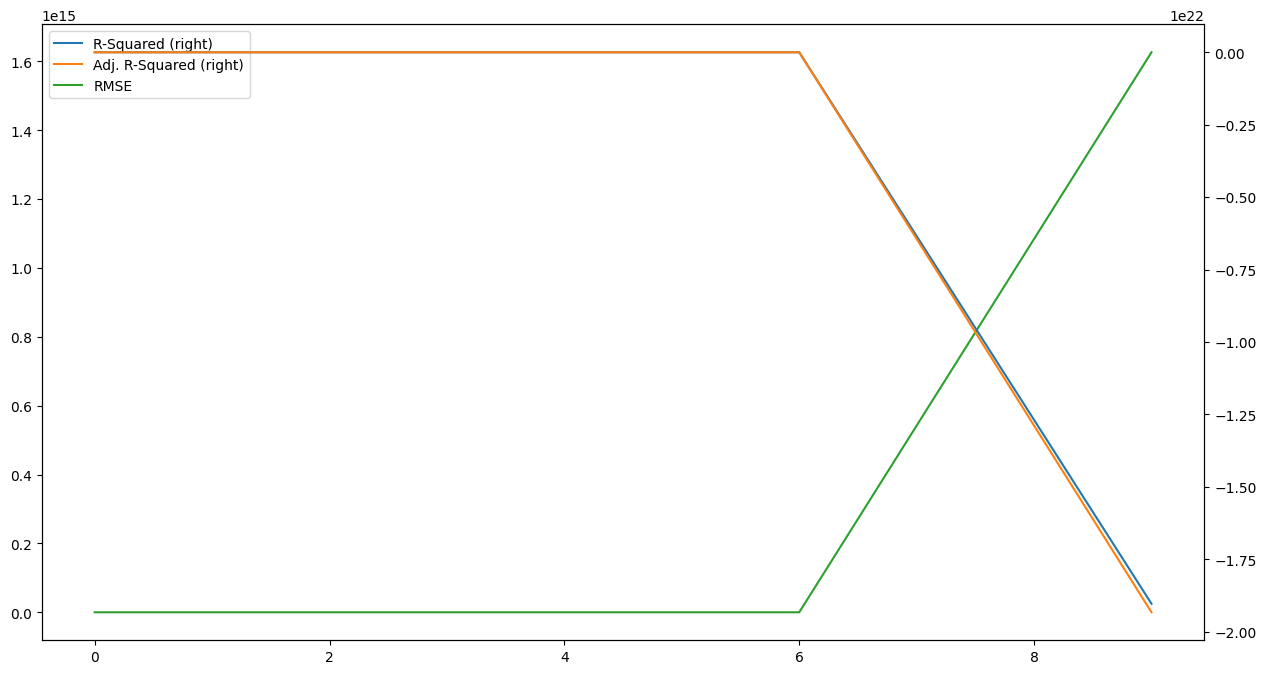

In [136]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()

#Result
The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.


Findings suggest that the linear regression with interaction algorithm has the highest accuracy with lowest RMSE. Finally, it can be concluded that the linear regression with interaction can be used by insurance company to predict claim amount for its customers.